#**Linear Regression Model Prediction**

##**Import Package**


In [2]:
#importing package from libraries
import warnings
warnings.filterwarnings("ignore") #for ignore not important warnings
import numpy as np #for saintific process
import pandas as pd #for dataframe processing
import seaborn as sns #for data visualitation
import matplotlib.pyplot as plt #for data visualitation
%matplotlib inline
from scipy.stats import kstest #for kolmogrov smirnov test
from sklearn.model_selection import train_test_split #for train test split
from sklearn.linear_model import LinearRegression #for regression model
from sklearn.metrics import r2_score #for R Square
from sklearn.metrics import mean_squared_error #for RSME 
from sklearn.metrics import mean_absolute_error# for MAE
from sklearn.metrics import mean_absolute_percentage_error #for MAPE

In [3]:
from google.colab import drive #for connect to drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Data Understanding**

###1.Dataframe Identification

**Penjelasan variabel - variabel dalam dataset:**

- SalePrice: the property's sale price in dollars. This is the target variable to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [4]:
#load data train 
pd.set_option('display.max_columns', 200)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#show shape
df.shape

(1460, 81)

Berdasarkan output diketahui pada dataframe terdapat 81 kolom dan 1460 baris.

In [6]:
#show columns to know all variabel in dataframe
print(df.columns)
print(len(df.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Berdasarkan output di atas, diketahui dataframe memiliki cukup banyak variabel yang terdiri dari berbagai type data. Oleh karena itu, akan dilakukan penngelompokkan variabel berdasarkan type data numerik dan objek untuk memudahkan preprocessing data.

In [8]:
#grouping data as numeric and categoric
cats=[i for i in df.columns if df[i].dtypes == 'object'] 
nums=[i for i in df.columns if df[i].dtypes != 'object']
print(nums)
print(len(nums))
print(cats)
print(len(cats))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'G

Berdasarkan output di atas, telah dikelompokkan variabel-variabel dalam dataframe berdasarkan type data numerik dan objek. Dari hasil pengelompokkan diketahui terdapat 38 variabel numerik dan 43 variabel bertipe data objek.

In [9]:
#show dataframe information for numerical variabels to know data type every variabels, check for null value, and identify if other problems from dataframe
df[nums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Berdasarkan output diketahui terdapat 3 variabel bertipe data float dan 35 variabel bertipe data integer. Diketahui pula terdapat beberapa variabel numerik yang memiliki Missing Value. 

Selain itu, diketahui juga terdapat variabel `Id` yang sebenarnya merupakan variabel yang tidak diperlukan dalam analisis karena hanya menampilkan Id rumah. Sehingga, dapat dilakukan penghapusan variabel `Id`.  

In [10]:
#show missing value for numerical variabels
df[nums].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Berdasarkan output di atas diketahui terdapat Missing Value pada variabel `LotFrontage`, `MasVnrArea`, dan `GarageYrBlt`. Sehingga diperlukan Missing Value Handling untuk variabel - variabel numerik tersebut.

In [11]:
#show value type every numerical variabel to check unique every numerical variabel
for col in nums:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Id:
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

Value count kolom MSSubClass:
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Value count kolom LotFrontage:
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

Value count kolom LotArea:
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64

Value count kolom OverallQual:
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Value count kolom

Berdasarkan output, diketahui tidak terdapat nilai data yang dirasa aneh atau asing. Namun, terdapat beberapa variabel yang sebenarnya merupakan variabel bernilai data kategorik namun dalam skala ordinal yaitu variabel `MSSubClass`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`, `MoSold`, `YrSold`. Karena data telah berbentuk numerik dalam dataframe, maka tidak perlu adanya encoding data pada variabel tersebut.


In [12]:
#show dataframe information for object variabels to know data type every variabels, check for null value, and identify if other problems from dataframe
df[cats].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

Berdasarkan output diketahui terdapat 43 variabel bertipe data object. Diketahui pula terdapat beberapa variabel numerik yang memiliki Missing Value. 

In [13]:
#show missing value for object variabels
df[cats].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Berdasarkan output di atas diketahui bahwa terdapat Missing Value pada variabel `Alley`, `MasVnrType`, `BsmtQual` , `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature`. Oleh karena itu, diperlukan Missing Value Handling untuk variabel-variabel object tersebut. 



In [14]:
#show value type every categorical variabel to check unique every categorical variabel
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print(f'''Sum Value count kolom {col}:''')
    print(sum(df[col].value_counts()))
    print()

Value count kolom MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Sum Value count kolom MSZoning:
1460

Value count kolom Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64
Sum Value count kolom Street:
1460

Value count kolom Alley:
Grvl    50
Pave    41
Name: Alley, dtype: int64
Sum Value count kolom Alley:
91

Value count kolom LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Sum Value count kolom LotShape:
1460

Value count kolom LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Sum Value count kolom LandContour:
1460

Value count kolom Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Sum Value count kolom Utilities:
1460

Value count kolom LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Sum Value count kolom LotConfig:
1460

Value c

Berdasarkan output, diketahui bahwa tiap variabel object memiliki nilai data kategorik dan tidak terdapat unique/ nilai data kategorikyang dirasa aneh atau asing. Diketahui pula semua kategorik/ unique data dalam bentuk string sehingga perlu dilakukan Categorical Data Encoding untuk analisis lanjut.

### 2.Cleaning & Handling Dataframe


Berdasarkan identifikasi data yang telah dilakukan, akan dilakukan cleaning & handling data berupa:
- Menghapus kolom `Id`
- Missing Value Handling
- Categorical Data Encoding
- Outlier Checking & Handling

####a.Penghapusan kolom `Id`

In [15]:
#drop irrelevant columns
df=df.drop(columns=['Id'])
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Berdasarkan output di atas, diketahui bahwa sudah tidak ada kolom `Id` pada dataframe.

####b.Missing Value Handling
Berdasarkan identifikasi dataframe, diketahui bahwa terdapat Missing Value pada:
- Variabel Numerik: `LotFrontage`, `MasVnrArea`, dan `GarageYrBlt`.
- Variabel object: `Alley`, `MasVnrType`, `BsmtQual` , `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PoolQC`, `Fence`, `MiscFeature`.

In [16]:
#show sum of null for numerical variabels
print("Missing Value Numerical Variabels")
print(df[['LotFrontage', 'MasVnrArea',  'GarageYrBlt']].isnull().sum())
print("Missing Value Object Variabels")
#show sum of null object variabels
print(df[['Alley', 'MasVnrType', 'BsmtQual' , 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull().sum())

Missing Value Numerical Variabels
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
Missing Value Object Variabels
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Missing Value Handling 1**

Berdasarkan output di atas diketahui bahwa variabel - variabel yang memiliki Missing Value dengan jumlah yang tidak banyak adalah variabel `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`,`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, dan `GarageCond`. Oleh karena itu, dapat dilakukan Missing Value Handling dengan menggunakan metode `Pengisian menggunakan nilai median` untuk variabel numerik yaitu 
`MasVnrArea` dan `GarageYrBlt` serta metode `Pengisian menggunnakan nilai modus` untuk variabel non-numerik yaitu `MasVnrType`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`,`GarageType`, `GarageFinish`, `GarageQual`, dan `GarageCond`.

In [17]:
#Missing Value Handling Numerical Variabels
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
#Missing Value Handling Object Variabels
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

#show sum of null for numerical variabels
print("Missing Value Numerical Variabels")
print(df[['LotFrontage', 'MasVnrArea',  'GarageYrBlt']].isnull().sum())
print("Missing Value Object Variabels")
#show sum of null object variabels
print(df[['Alley', 'MasVnrType', 'BsmtQual' , 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish','GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull().sum())

Missing Value Numerical Variabels
LotFrontage    259
MasVnrArea       0
GarageYrBlt      0
dtype: int64
Missing Value Object Variabels
Alley           1369
MasVnrType         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinType2       0
Electrical         0
FireplaceQu      690
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Berdasarkan output di atas diketahui bahwa sudah tidak ada Missing Value pada variabel  `MasVnrType`, `MasVnrArea`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Electrical`,`GarageType`, `GarageYrBlt`, `GarageFinish`, `GarageQual`, dan `GarageCond`.

---

**Missing Value Handling 2** 

Berdasarkan output di atas diketahui bahwa terdapat lebih dari 10% Missing Value dari total banyaknya Nilai Data pada variabel `LotFrontage`, `Alley`, `FireplaceQu`, `PoolQC`, `Fence`, dan `MiscFeature`. Oleh karena itu, karena terlalu banyak missing value maka akan dilakukan Missing Value Handling menggunakan metode `Penghapusan Kolom` pada variabel - variabel tersebut.

In [18]:
#Missing Value Handling Drop Method
df = df.drop(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
print(df.columns)
print(df.shape)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

Berdasarkan output diketahui bahwa setelah dilakukan Missing Value Handling dataframe memiliki 74 variabel dan 1460 baris.

####c.Categorical Data Encoding

In [19]:
#grouping data as numeric and categoric after Missing Value Handling (Drop Method)
cats=[i for i in df.columns if df[i].dtypes == 'object'] 
nums=[i for i in df.columns if df[i].dtypes != 'object' ]
print(nums)
print(len(nums))
print(cats)
print(len(cats))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
36
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Sale

Telah dilakukan grouping ulang setelah terdapat beberapa variabel yang sudah dihapus pada tahap Missing Value Handling dan dihasilkan grouping yang terdiri dari 36 variabel numerik dan 38 variabel objek.

In [20]:
# Frequency Encoding
for col in cats:
  freq_et = df[col].value_counts().reset_index() #take value counts for each object variabels as dataframe
  freq_et.rename(columns={"index": f"{col}", f"{col}": f"freq_{col}"}, inplace = True)#rename column
  freq_et[f'pct_{col}'] = round((freq_et[f"freq_{col}"]/freq_et[f"freq_{col}"].sum())*100,2)#make new column "percentage unique of each object variabels "
  df = df.merge(freq_et[[f'{col}',f'pct_{col}']], on=f'{col}', how='inner')#merge percentage column in df dataframe

Telah dilakukan proses Data Encoding pada variabel - variabel objek untuk mengubah kategori unique/ nilai data dalam bentuk numerik. Proses dilakukan melalui looping function mengingat jumlah variabel cukup banyak.

In [21]:
df

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pct_MSZoning,pct_Street,pct_LotShape,pct_LandContour,pct_Utilities,pct_LotConfig,pct_LandSlope,pct_Neighborhood,pct_Condition1,pct_Condition2,pct_BldgType,pct_HouseStyle,pct_RoofStyle,pct_RoofMatl,pct_Exterior1st,pct_Exterior2nd,pct_MasVnrType,pct_ExterQual,pct_ExterCond,pct_Foundation,pct_BsmtQual,pct_BsmtCond,pct_BsmtExposure,pct_BsmtFinType1,pct_BsmtFinType2,pct_Heating,pct_HeatingQC,pct_CentralAir,pct_Electrical,pct_KitchenQual,pct_Functional,pct_GarageType,pct_GarageFinish,pct_GarageQual,pct_GarageCond,pct_PavedDrive,pct_SaleType,pct_SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,78.84,99.59,63.36,89.79,99.93,72.05,94.66,10.27,86.30,98.97,83.56,30.48,78.15,98.22,35.27,34.52,30.48,33.42,87.81,44.32,42.33,92.33,67.88,28.63,88.63,97.81,50.75,93.49,91.44,40.14,93.15,65.14,28.90,95.34,96.37,91.78,86.78,82.05
1,60,RL,12435,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,Ex,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,0,5,2008,WD,Normal,231500,78.84,99.59,63.36,89.79,99.93,72.05,94.66,10.27,86.30,98.97,83.56,30.48,78.15,98.22,35.27,34.52,30.48,33.42,87.81,44.32,42.33,92.33,67.88,28.63,88.63,97.81,50.75,93.49,91.44,40.14,93.15,65.14,28.90,95.34,96.37,91.78,86.78,82.05
2,60,RL,8158,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,252.0,Gd,TA,PConc,Gd,TA,No,GLQ,550,Unf,0,334,884,GasA,Ex,Y,SBrkr,884,884,0,1768,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,543,TA,TA,Y,0,63,0,0,0,0,0,7,2008,WD,Normal,224900,78.84,99.59,63.36,89.79,99.93,72.05,94.66,10.27,86.30,98.97,83.56,30.48,78.15,98.22,35.27,34.52,30.48,33.42,87.81,44.32,42.33,92.33,67.88,28.63,88.63,97.81,50.75,93.49,91.44,40.14,93.15,65.14,28.90,95.34,96.37,91.78,86.78,82.05
3,60,RL,10000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,1995,1996,Gable,CompShg,VinylSd,VinylSd,BrkFace,438.0,Gd,TA,PConc,Gd,TA,No,GLQ,1079,Unf,0,141,1220,GasA,Ex,Y,SBrkr,1220,870,0,2090,1,0,2,1,3,1,Gd,8,Typ,1,Attchd,1995.0,RFn,2,556,TA,TA,Y,0,65,0,0,0,0,0,12,2007,WD,Normal,240000,78.84,99.59,63.36,89.79,99.93,72.05,94.66,10.27,86.30,98.97,83.56,30.48,78.15,98.22,35.27,34.52,30.48,33.42,87.81,44.32,42.33,92.33,67.88,28.63,88.63,97.81,50.75,93.49,91.44,40.14,93.15,65.14,28.90,95.34,96.37,91.78,86.78,82.05
4,60,RL,9548,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,PConc,Gd,TA,No,GLQ,483,Unf,0,458,941,GasA,Ex,Y,SBrkr,941,888,0,1829,1,0,2,1,3,1,Gd,7,Typ,1,Attchd,2003.0,RFn,2,613,TA,TA,Y,192,39,0,0,0,0,0,1,2010,WD,Normal,237000,78.84,99.59,33.15,89.79,99.93,6.44,94.66,10.27,86.30,98.97,83.56,30.48,78.15,98.22,35.27,34.52,30.48,33.42,87.81,44.32,42.33,92.33,67.88,28.63,88.63,97.81,50.75,93.49,91.44,40.14,93.15,65.14,28.90,95.34,96.37,91.78,86.78

Berdasarkan output di atas, telah dihasilkan kolom baru yang berisi nilai percentase dari frekuensi tiap unique pada tiap variabel `object`. Nilai tersebut berskala nominal.

####d.Outlier Checking & Handling

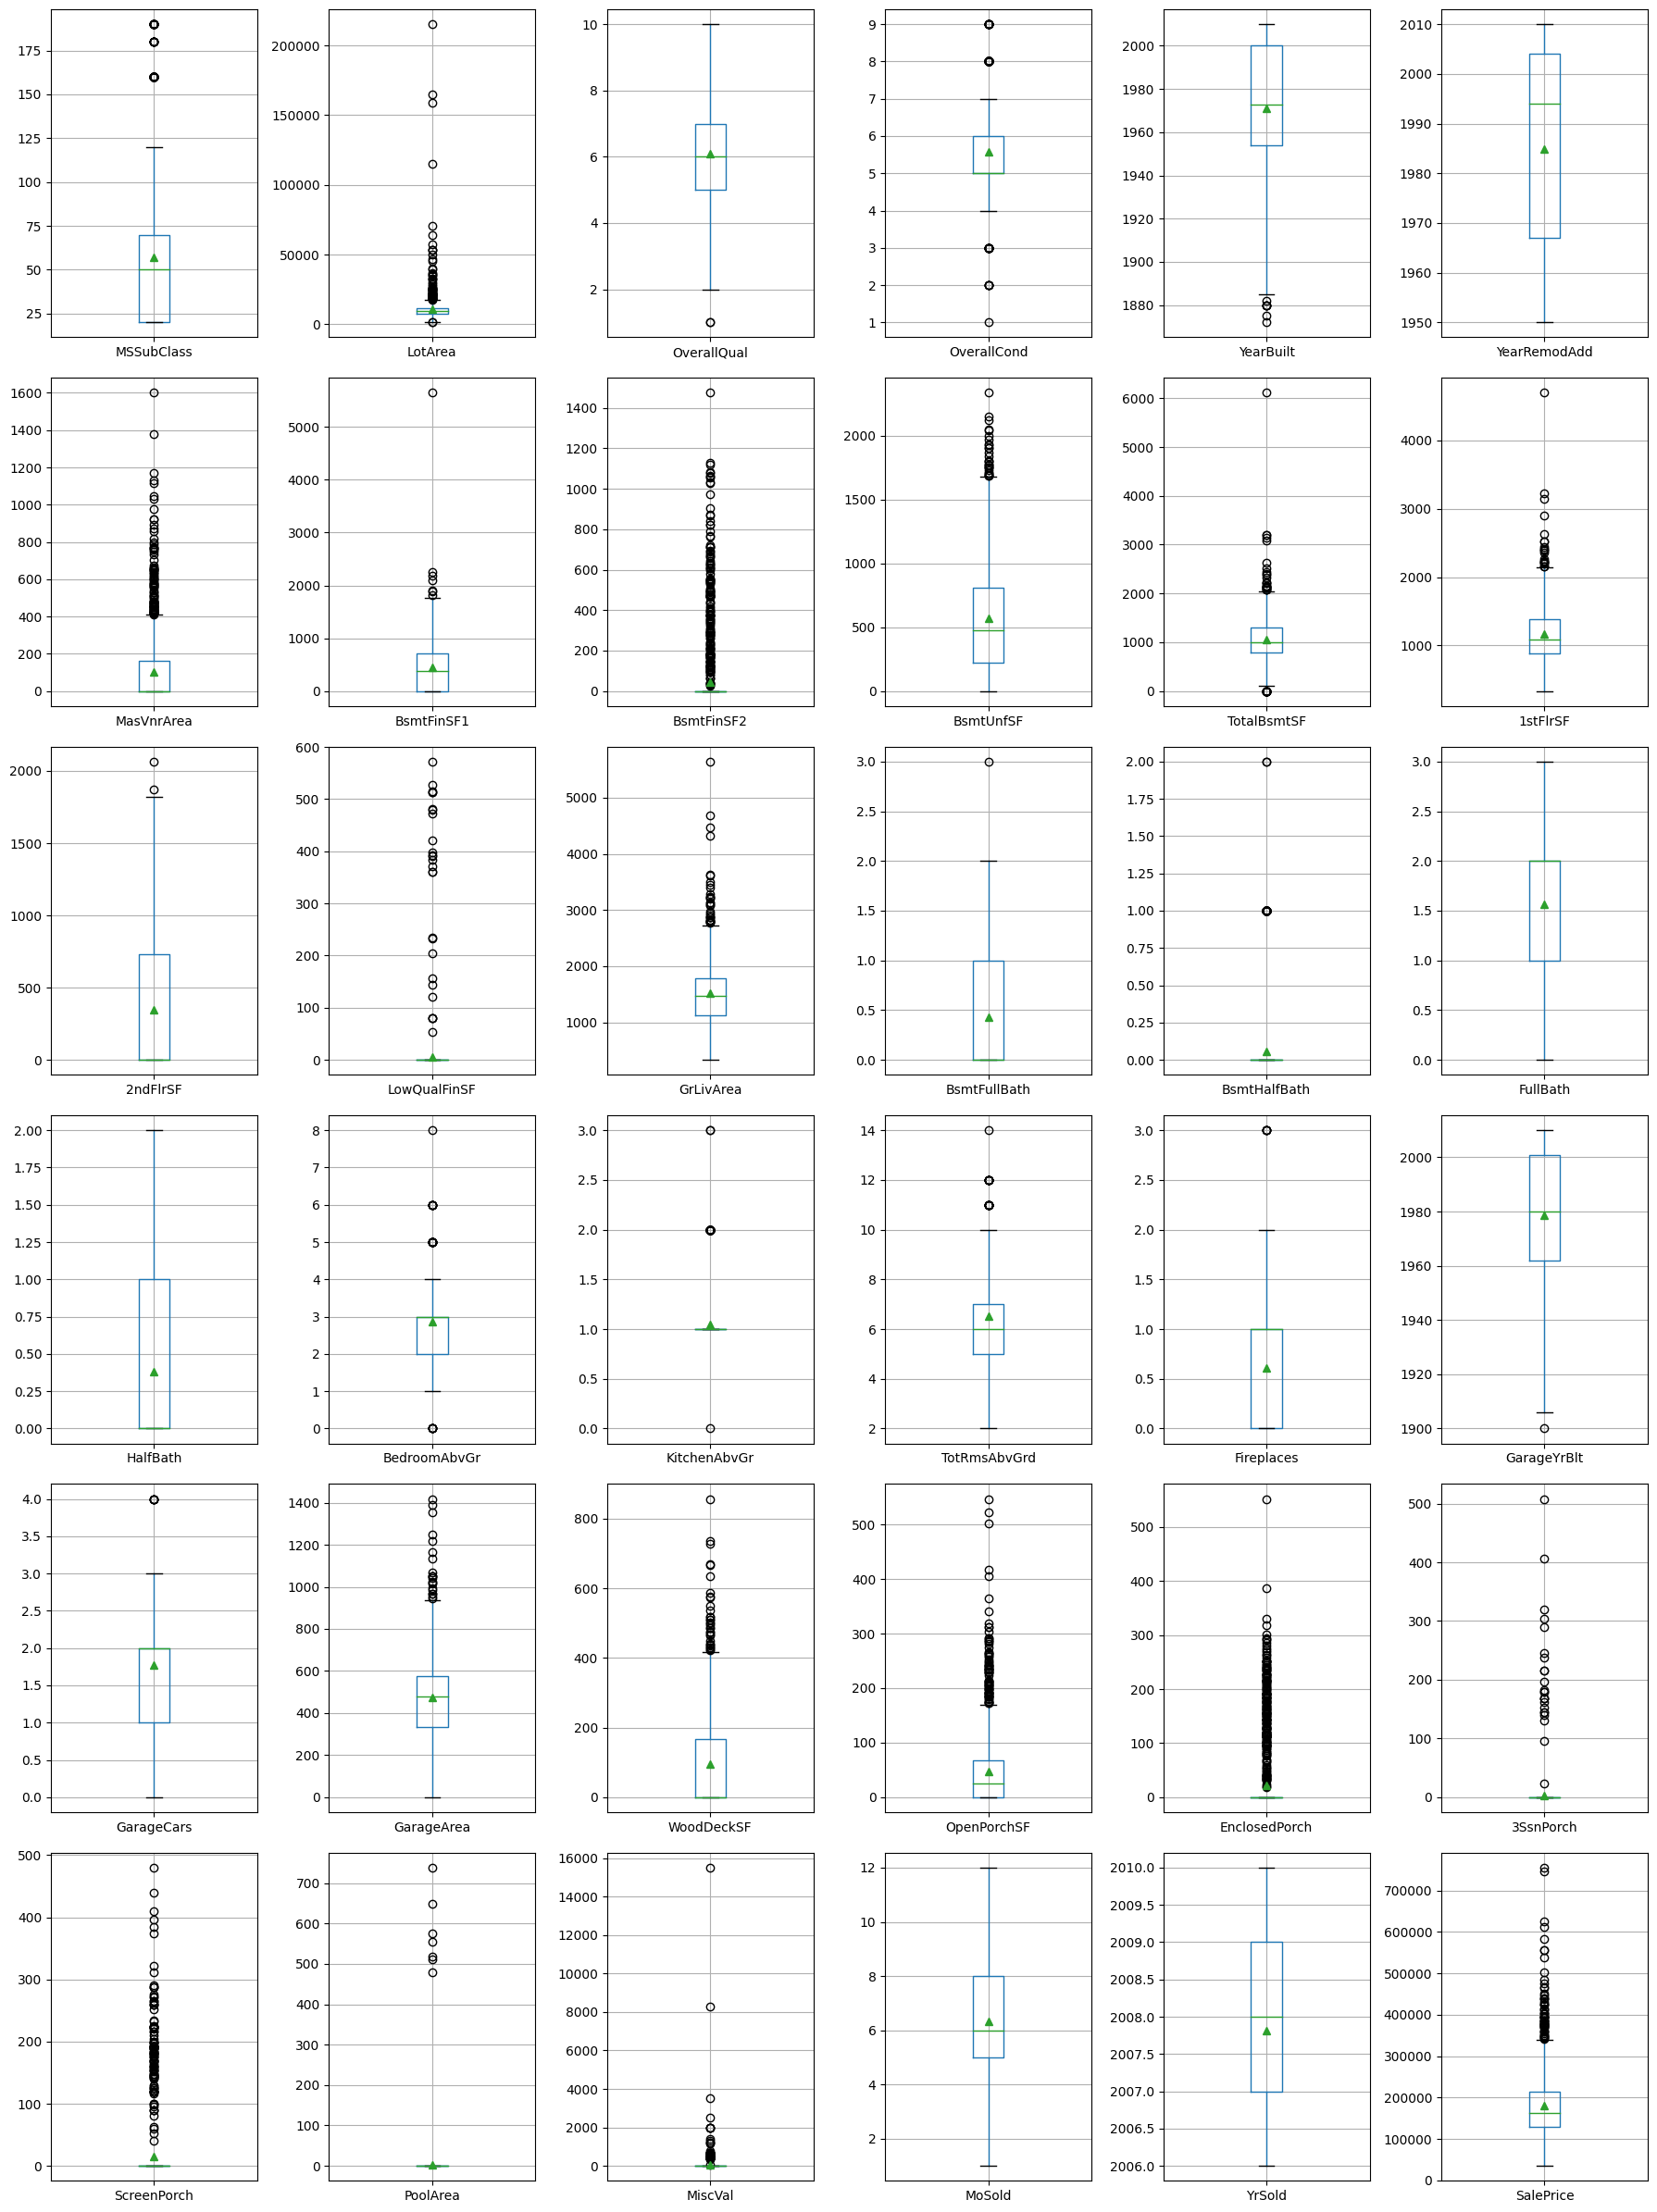

In [22]:
#show boxplot visualitation for all numeric variabel to know outliers
plt.figure(figsize=(18,24)) #make a figure to boxplot place with size that needed. In this case wide=18 and long=24
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(6, 6, i+1) #make subplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output diketahui terdapat outliers pada variabel - variabel tertentu. Oleh karena itu,perlu dilakukan Outliers Handling apabila outliers tersebut diketahui akan mempengaruhi analisis. 

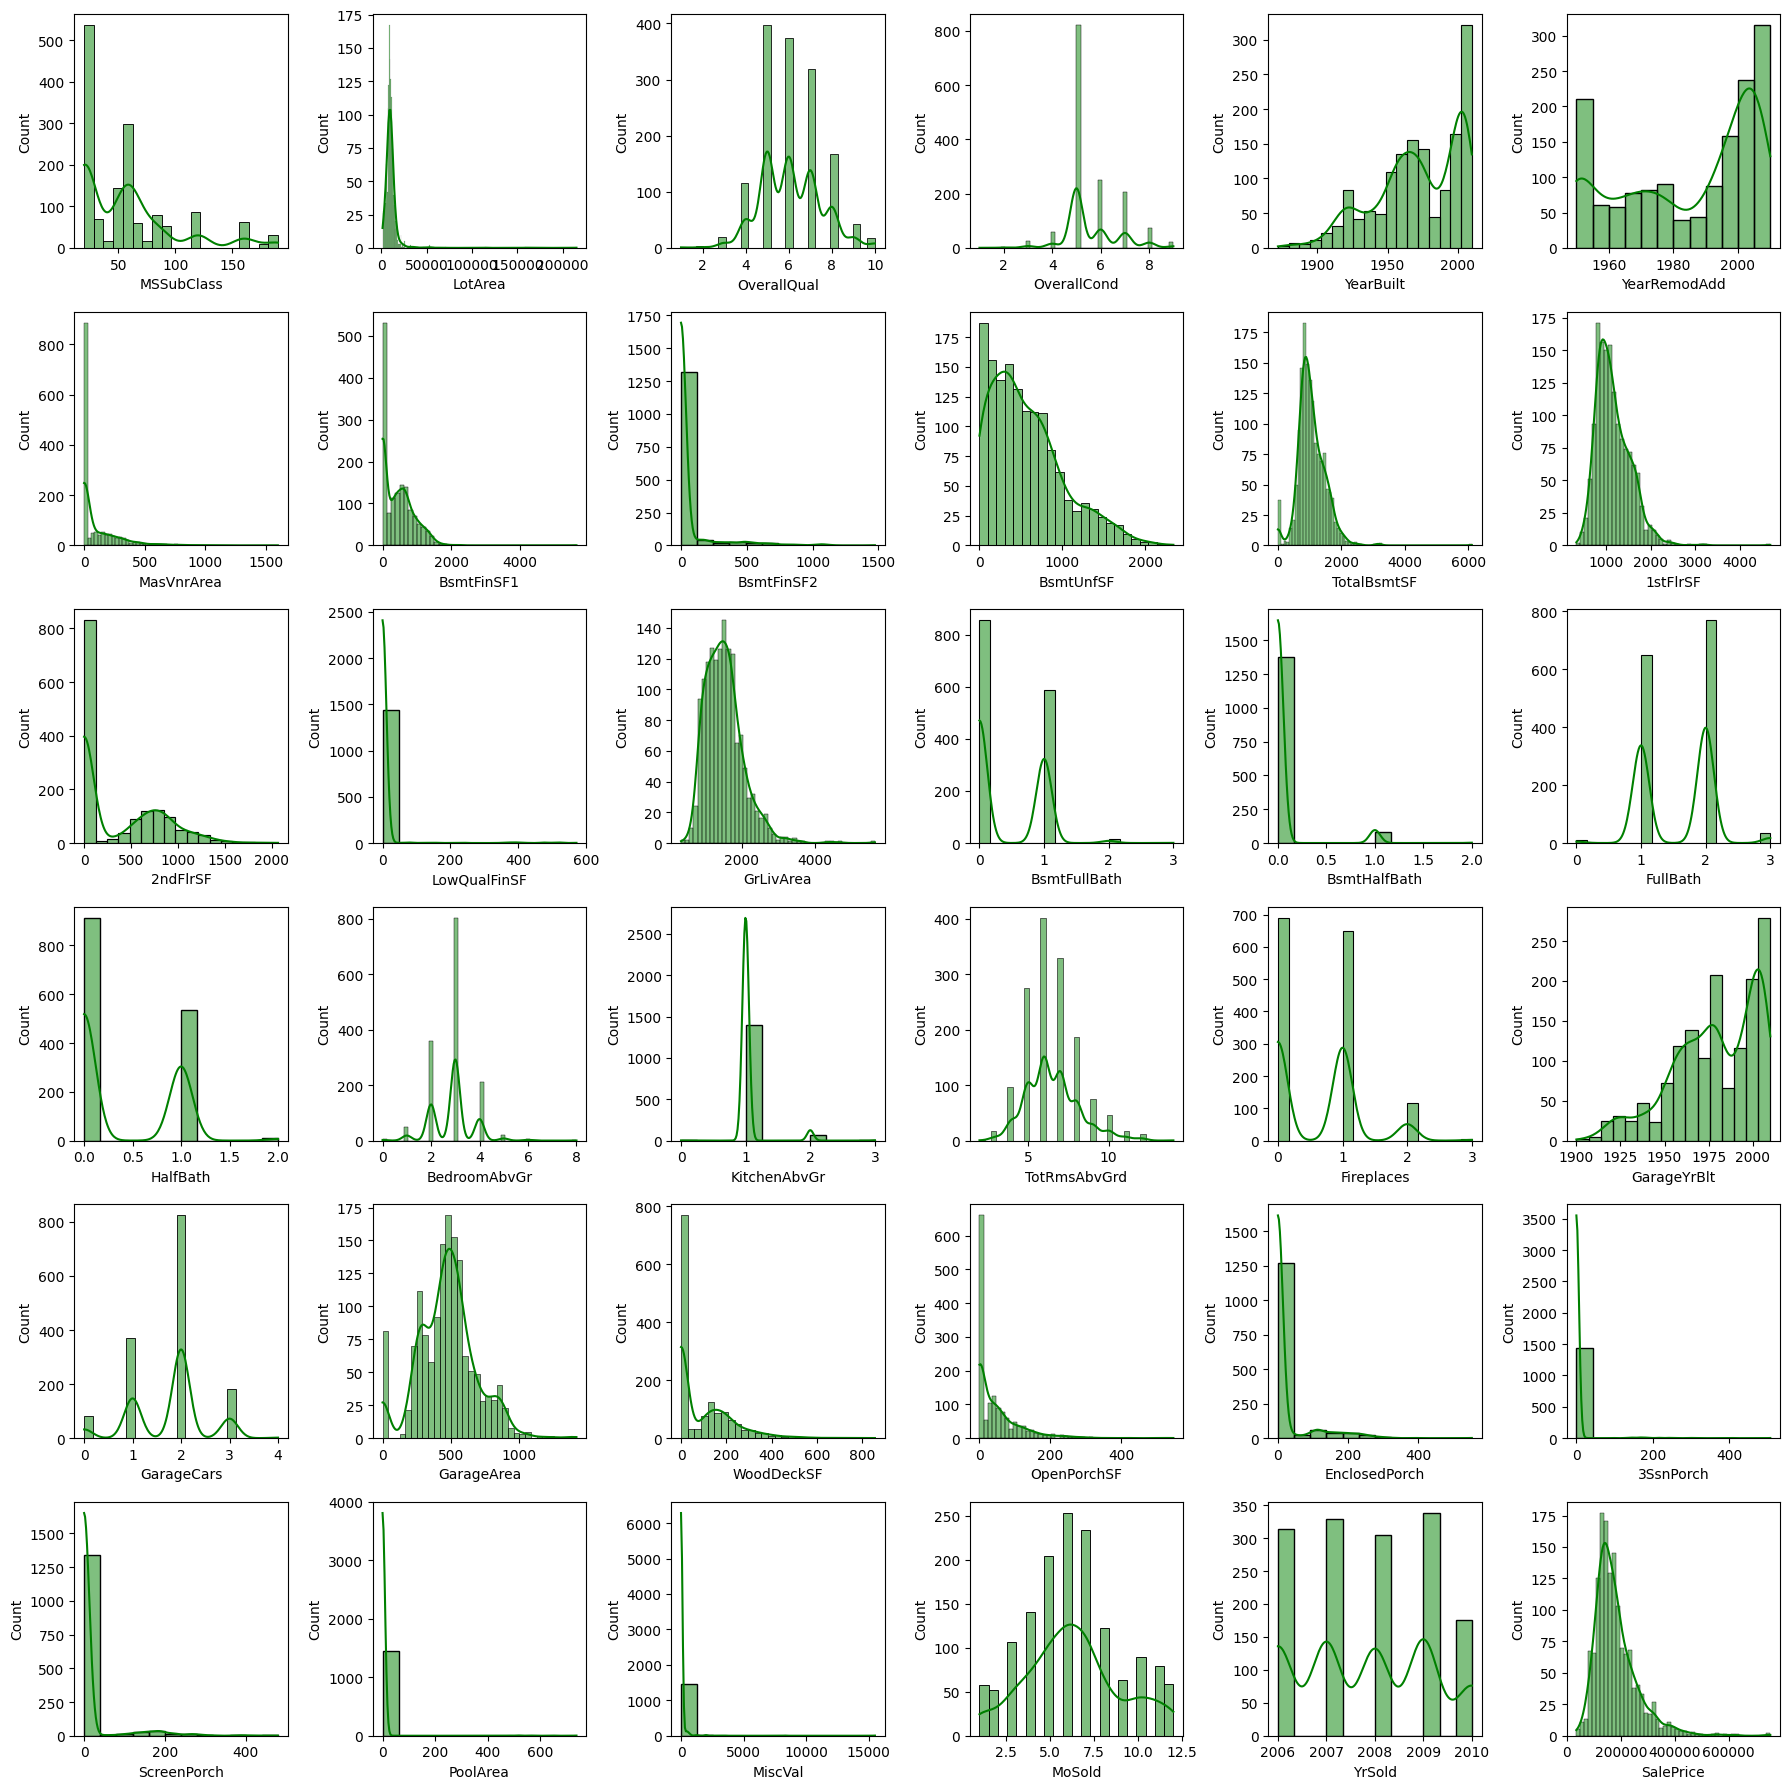

In [23]:
#show histplot visualitation for all numeric variabel to know distribution of each variabels
plt.figure(figsize=(18, 18)) #make a figure to histplot place with size that needed. In this case wide=18 and long=18
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(6, 6, i+1) #make subplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    sns.histplot(df[nums[i]], color='green', kde=True) #show histplot for each variabel  with green color,, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output diketahui bahwa banyak data memiliki kemiringan sehinga bentuk histplot tidak simetris. Tidak terdapat data yang memiliki distribusi yang baik. Oleh karena itu, perlu dilakukan Outliers Handling menggunakan metode Transformation untuk memperoleh data untuk analisis yang lebih baik.

In [24]:
#Log Transformation for Numerical Variabels
for col in nums:
  df[col] = np.log(df[col]+1)

Telah dilakukan transformasi data menggunakan fungsi logaritma dengan bantuan looping function python mengingat jumlah data yang cukup banyak.

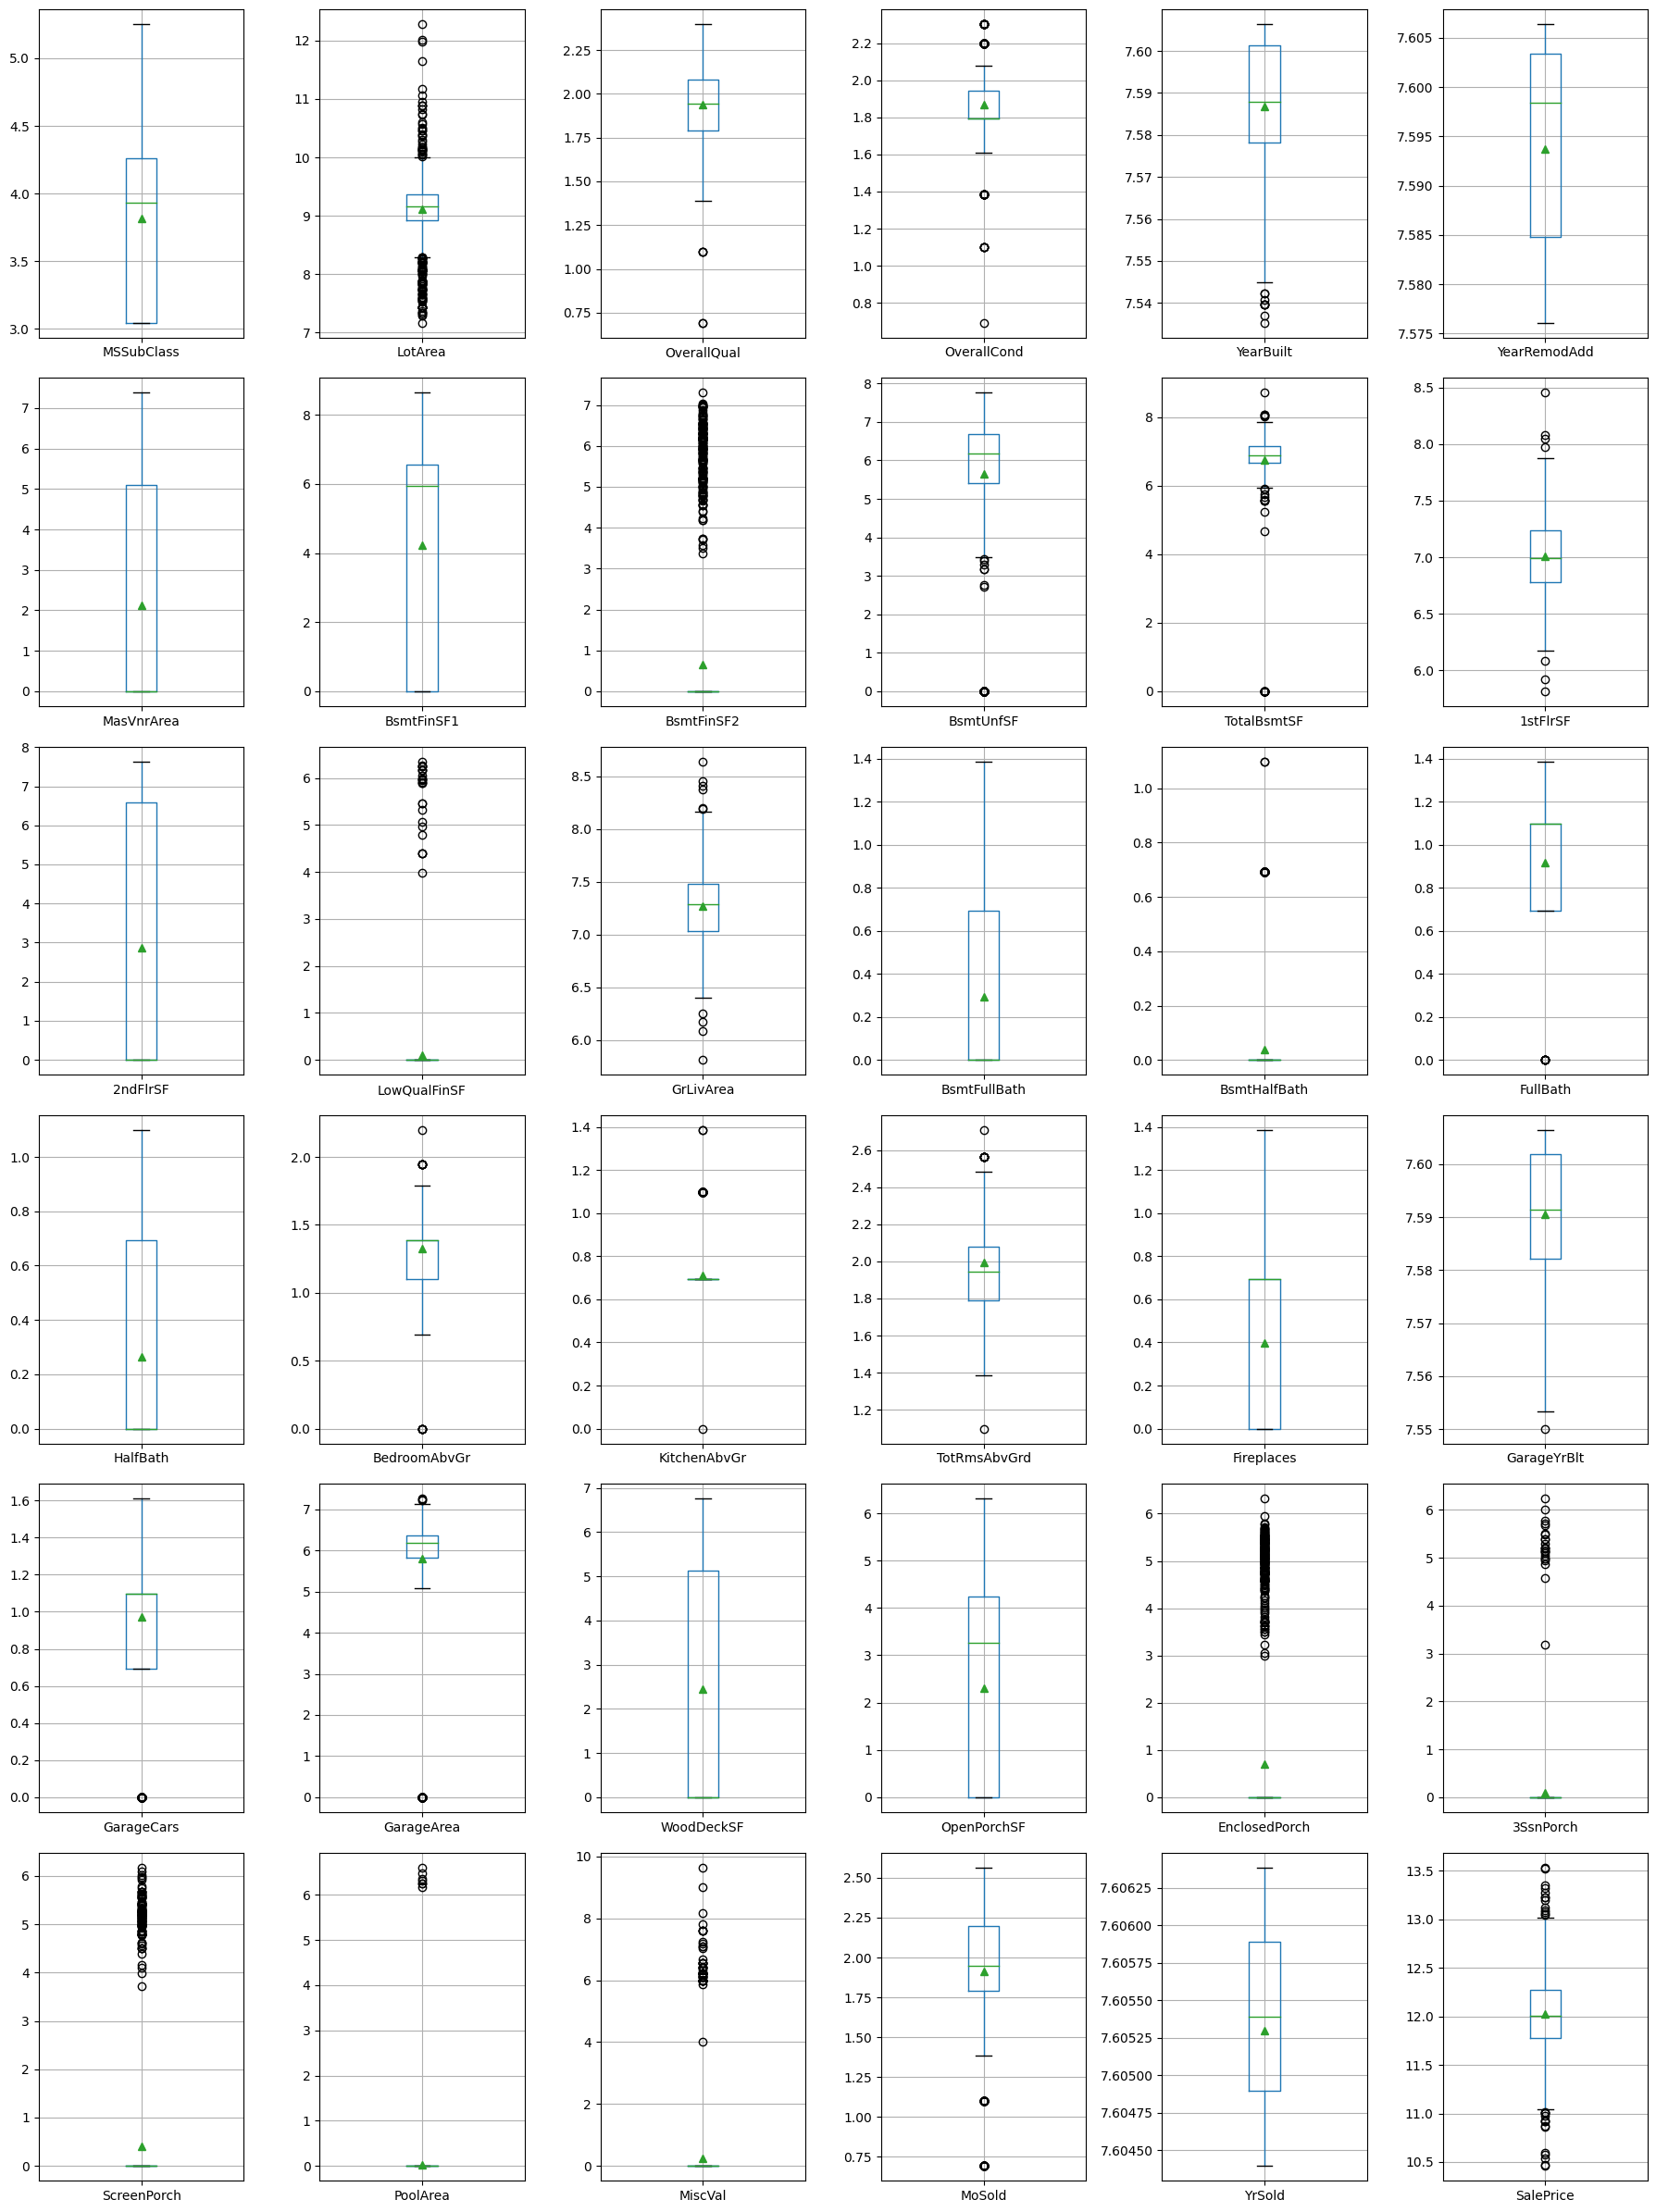

In [25]:
#show boxplot visualitation for all numeric variabel after transform to know outliers
plt.figure(figsize=(18,24)) #make a figure to boxplot place with size that needed. In this case wide=18 and long=24
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(6, 6, i+1) #make boxplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas terlihat bahwa masih terdapat outliers namun dengan jarak yang lebih padat dari sebelumnya. Untuk memastikan apakah data menjadi lebih baik dari sebelumnya perlu ditampilkan histplot untuk melihat bentuk distribusinya.

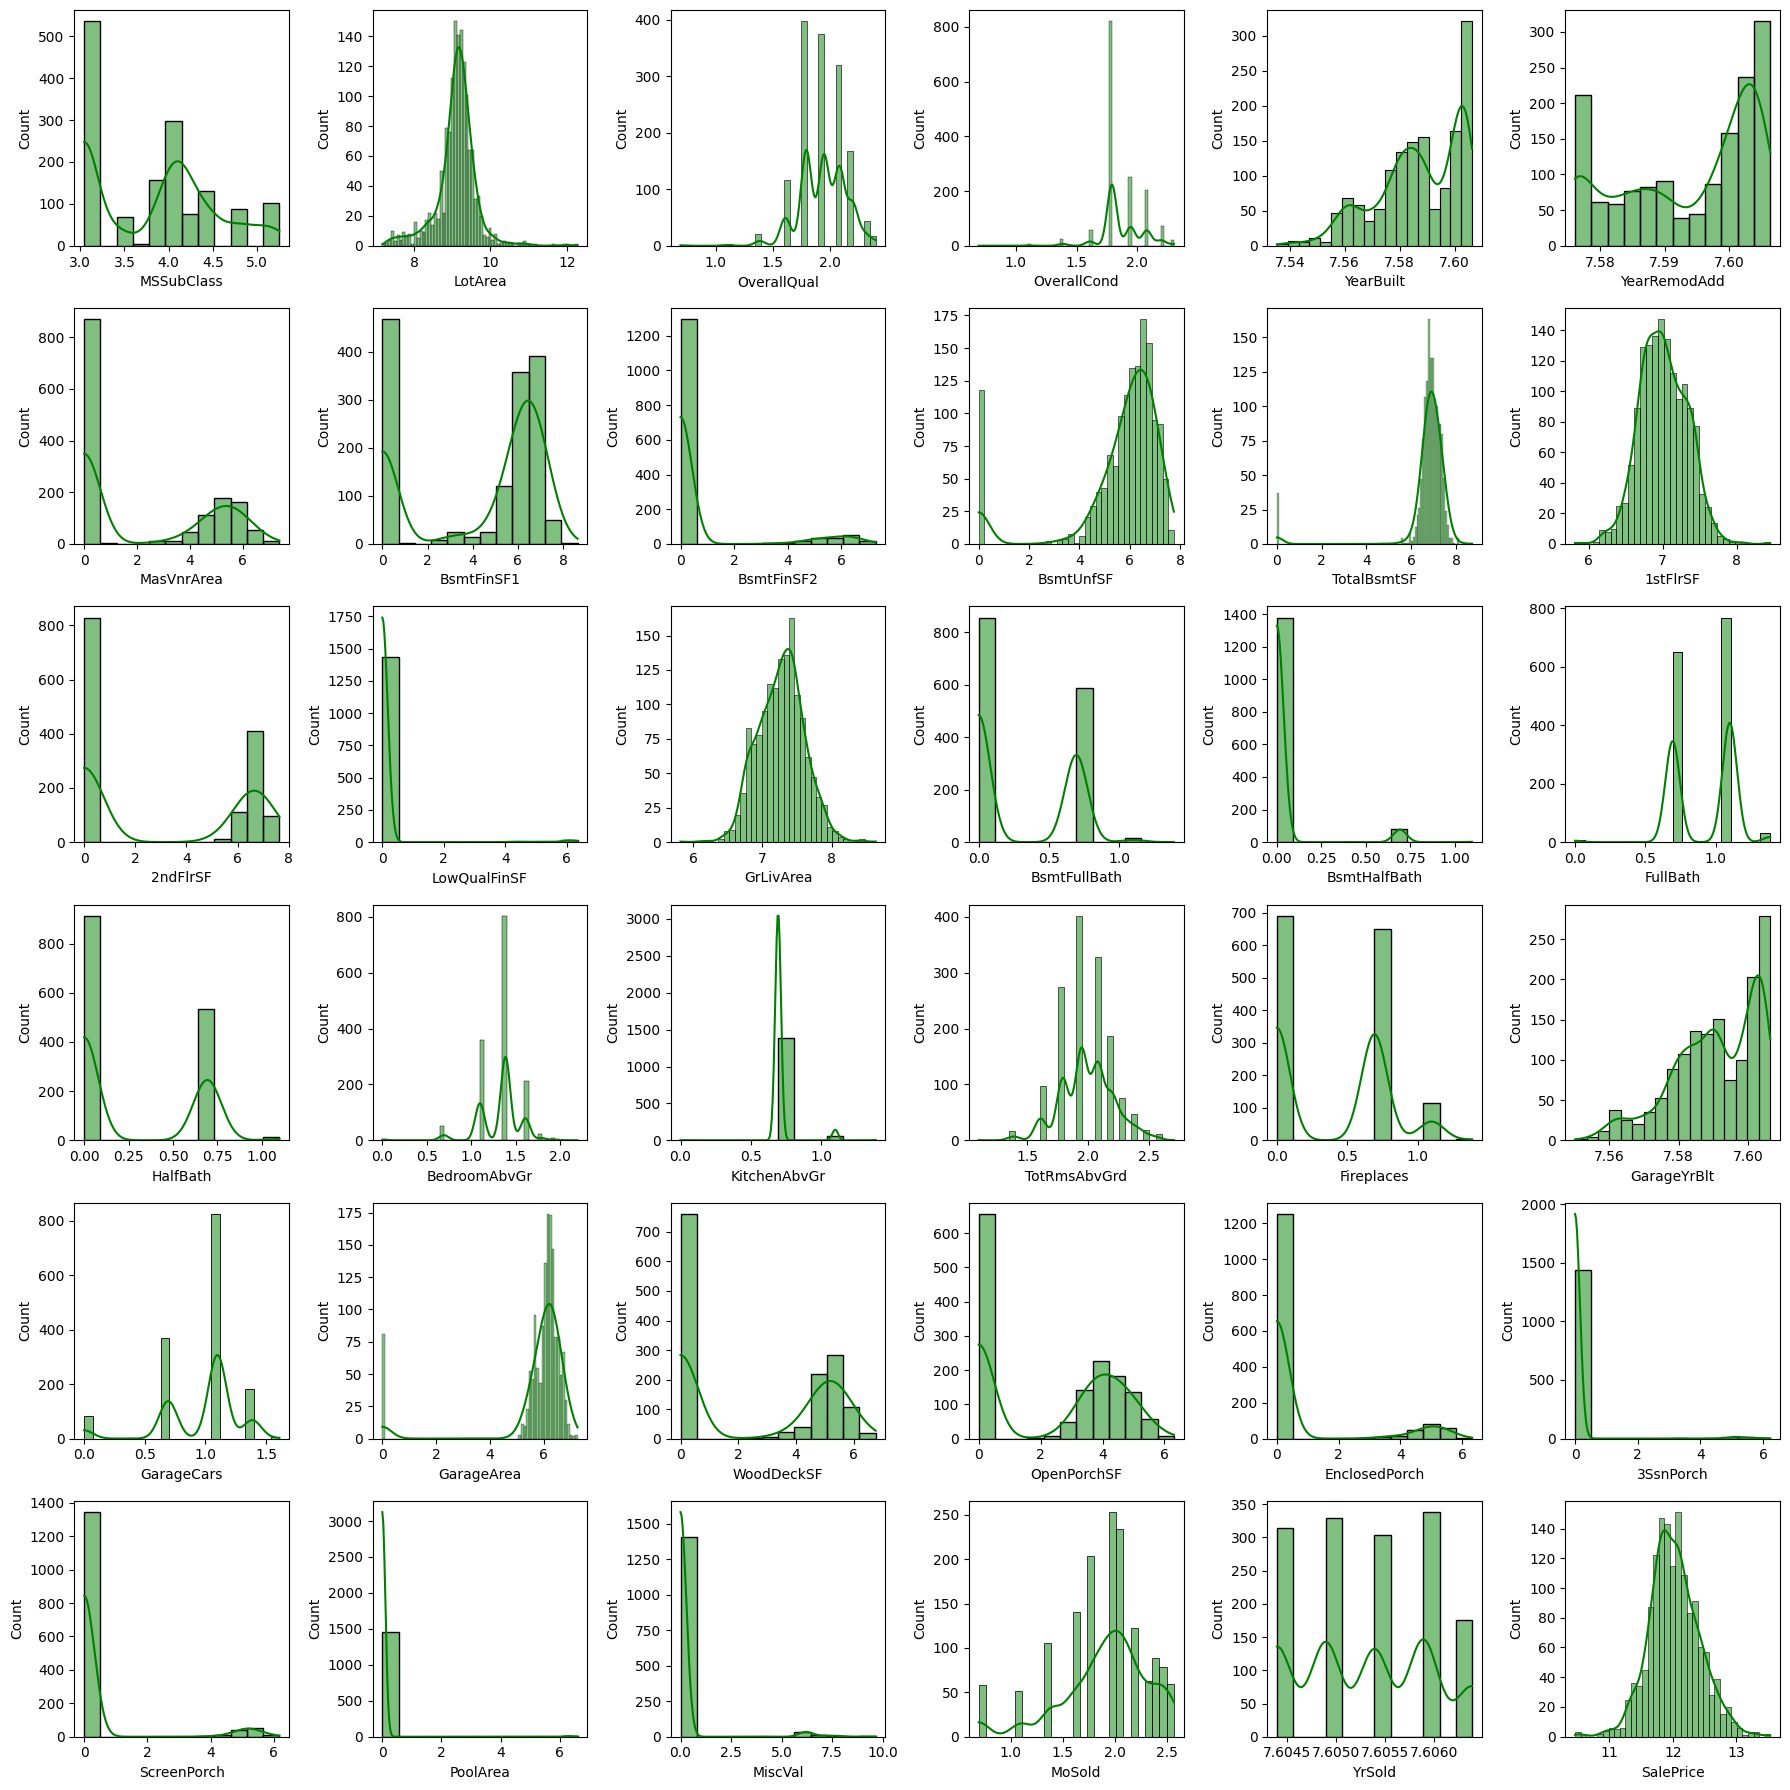

In [26]:
#show histplot visualitation for all numeric variabel to know distribution of each variabels
plt.figure(figsize=(18, 18)) #make a figure to histplot place with size that needed. In this case wide=18 and long=18
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(6, 6, i+1) #make histplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    sns.histplot(df[nums[i]], color='green', kde=True) #show histplot for each variabel  with green color,, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas terlihat terdapat beberapa variabel memiliki distribusi yang lebih baik setelah dilakukan transformasi seperti variabel `SalePrice`, `LotArea`, `GrLivArea`, dan `1stFlrSF`.

###3.Statistical Summary

In [27]:
#show statistics summary for numeric variabel
df[nums].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.818794,9.110966,1.940309,1.869266,7.586821,7.593756,2.120264,4.229731,0.655398,5.648378,6.750560,7.008452,2.864586,0.099814,7.268512,0.291395,0.039486,0.917827,0.263025,1.327943,0.711673,1.994407,0.399875,7.590571,0.972599,5.808156,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,1.910828,7.605300,12.024057
std,0.688354,0.517369,0.201983,0.168400,0.015389,0.010424,2.628759,2.992052,1.845045,1.854020,1.145712,0.317431,3.293311,0.747354,0.333303,0.349839,0.162599,0.223281,0.341869,0.229907,0.089268,0.214246,0.394660,0.012174,0.322269,1.455118,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,0.425540,0.000661,0.399449
min,3.044522,7.170888,0.693147,0.693147,7.535297,7.576097,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612,0.000000,7.550135,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,7.604396,10.460271
25%,3.044522,8.929898,1.791759,1.791759,7.578145,7.584773,0.000000,0.000000,0.000000,5.411646,6.680541,6.783325,0.000000,0.000000,7.030415,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,1.791759,0.000000,7.582229,0.693147,5.815592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.791759,7.604894,11.775105
50%,3.931826,9.156887,1.945910,1.791759,7.587817,7.598399,0.000000,5.951943,0.000000,6.170651,6.900227,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,7.591357,1.098612,6.175867,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,7.605392,12.001512
75%,4.262680,9.358976,2.079442,1.945910,7.601402,7.603399,5.107456,6.569832,0.000000,6.695799,7.169542,7.238676,6.591674,0.000000,7.483104,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,2.079442,0.693147,7.601902,1.098612,6.357842,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,2.197225,7.605890,12.273736
max,5.252273,12.279537,2.397895,2.302585,7.606387,7.606387,7.378384,8.638525,7.296413,7.756623,8.717846,8.453827,7.633370,6.350886,8.638171,1.386294,1.098612,1.386294,1.098612,2.197225,1.386294,2.708050,1.386294,7.606387,1.609438,7.257708,6.754604,6.306275,6.315358,6.232448,6.175867,6.605298,9.648660,2.564949,7.606387,13.534474


Berdasarkan output di atas diketahui bahwa variabel yang memiliki left skewness adalah MSSubClass, LotArea, OverallQual, YearBuilt,	YearRemodAdd,	BsmtFinSF1, BsmtUnfSF, TotalBsmtSF,	1stFlrSF, GrLivArea, FullBath,	HalfBath,	BedroomAbvGr,	TotRmsAbvGrd,	Fireplaces,	GarageYrBlt,	GarageCars,	GarageArea,	OpenPorchSF,MoSold, dan YrSold.	Hal tersebut karena nilai mean<median. Sementara, variabel lainnya memiliki inlai mean>median sehingga memiliki right skewness. Berdasarkan summary data, tidak terdapat variabel yang memiliki nilai mean dan median yang relatif sama sehingga dapat dikataan tidak terdapat data yang berdistribusi normal. 

In [28]:
#show statistics summary for categorical variabel
df[cats].describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,872,906,1282,647,686,1348,991,467,1294,1428,741,1365,1335,735,1360,951,686,1392,1407,1340,1267,1198


Berdasarkan output di atas diketahui bahwa terdapat beberapa variabel yang memiliki ketimpangan distribusi antar unique nya atau nilai data kategoriknya. Hal tersebut terlihat pada perbadingan nilai pada baris `freq` yang menunjukkan jumlah nilai data untuk unique yang paling sering muncul dengan nilai pada baris `count` yang menunjukkan banyak nilai data tiap variabel dan barus `unique` yang menujukkan banyaknya unique. Ketimpangan tersebut terjadi pada hampir semua variabel kecuali variabel `GarageFinish`, `BsmtFinType1`, `Neighborhood	`.

###4.Univariate Analysis

**Numerical Variabels Analysis**

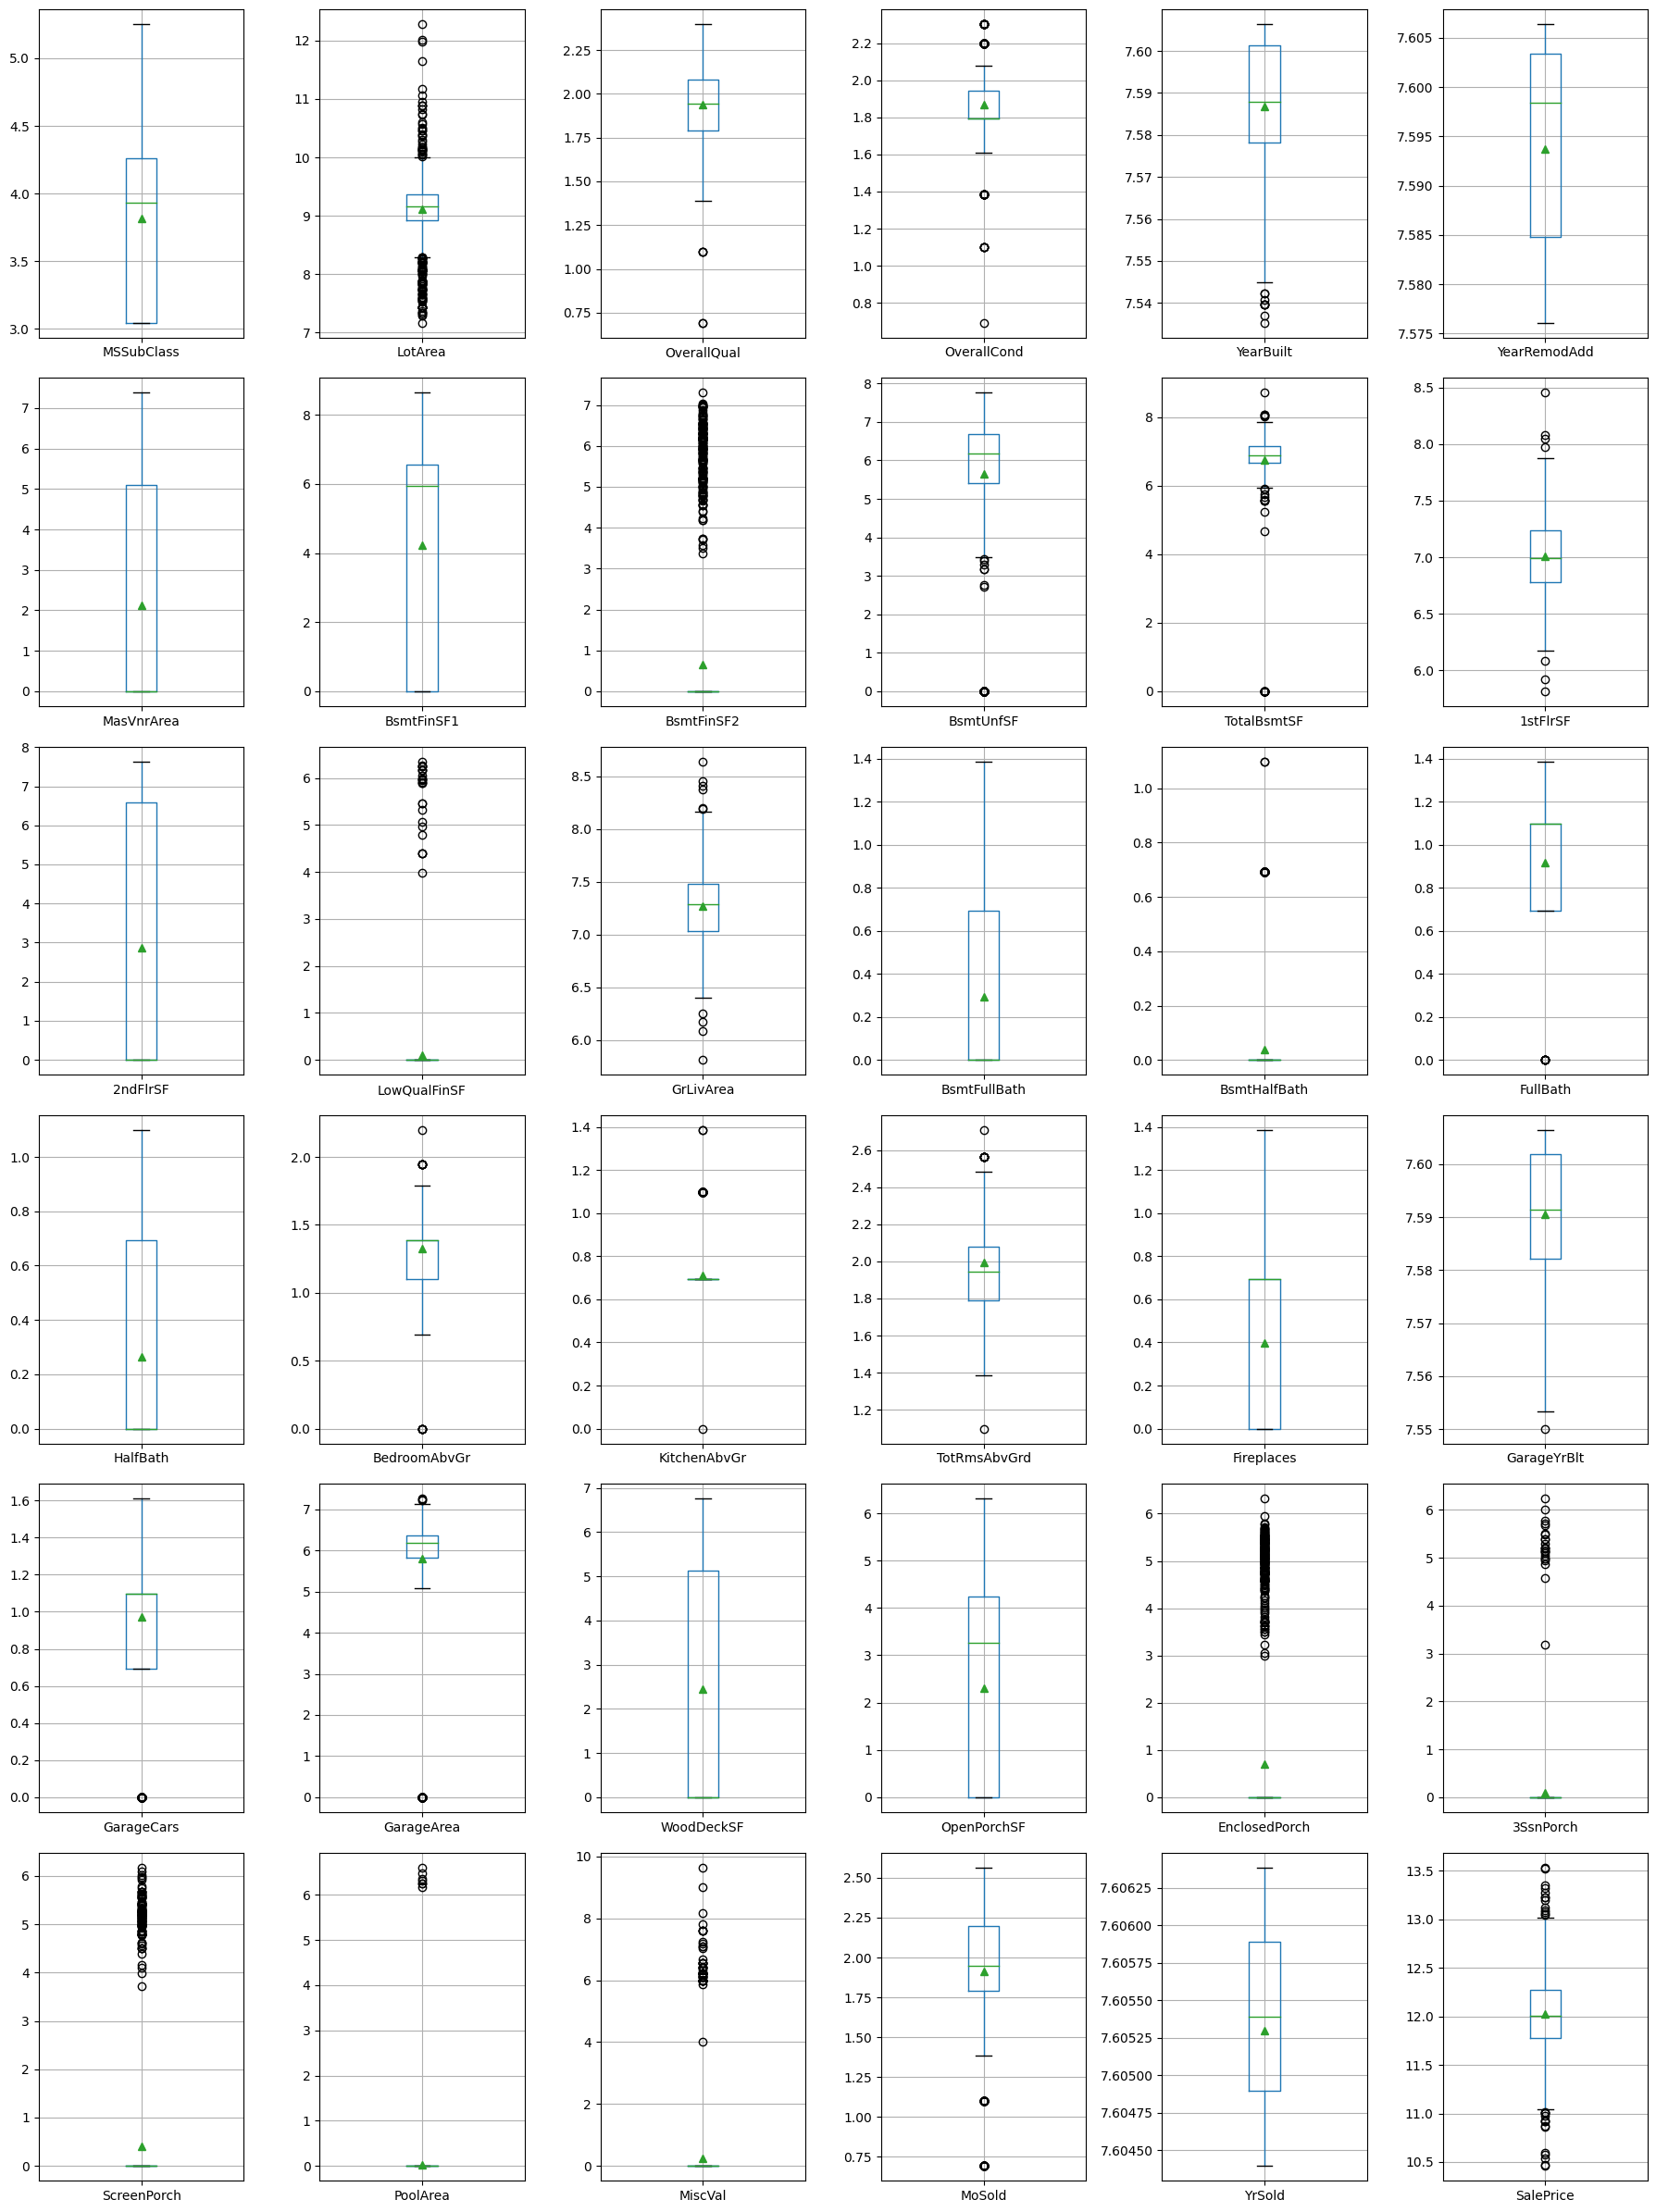

In [29]:
#show boxplot visualitation for all numeric variabel
plt.figure(figsize=(18,24)) #make a figure to boxplot place with size that needed. In this case wide=18 and long=24
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(6, 6, i+1) #make boxplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output boxplot di atas diketahui bahwa variabel yang memiliki left skewness adalah MSSubClass, LotArea, OverallQual, YearBuilt,	YearRemodAdd,	BsmtFinSF1, BsmtUnfSF, TotalBsmtSF,	1stFlrSF, GrLivArea, FullBath, HalfBath,	BedroomAbvGr,	TotRmsAbvGrd,	Fireplaces,	GarageYrBlt,	GarageCars,	GarageArea,	OpenPorchSF,MoSold, dan YrSold.	Hal tersebut karena bottom whisker dari boxplot lebih panjang dari upper whisker. Sementara, variabel lainnya memiliki Upper whisker yang lebih panjang sehingga dikatakan memiliki distribusi right skewness. 

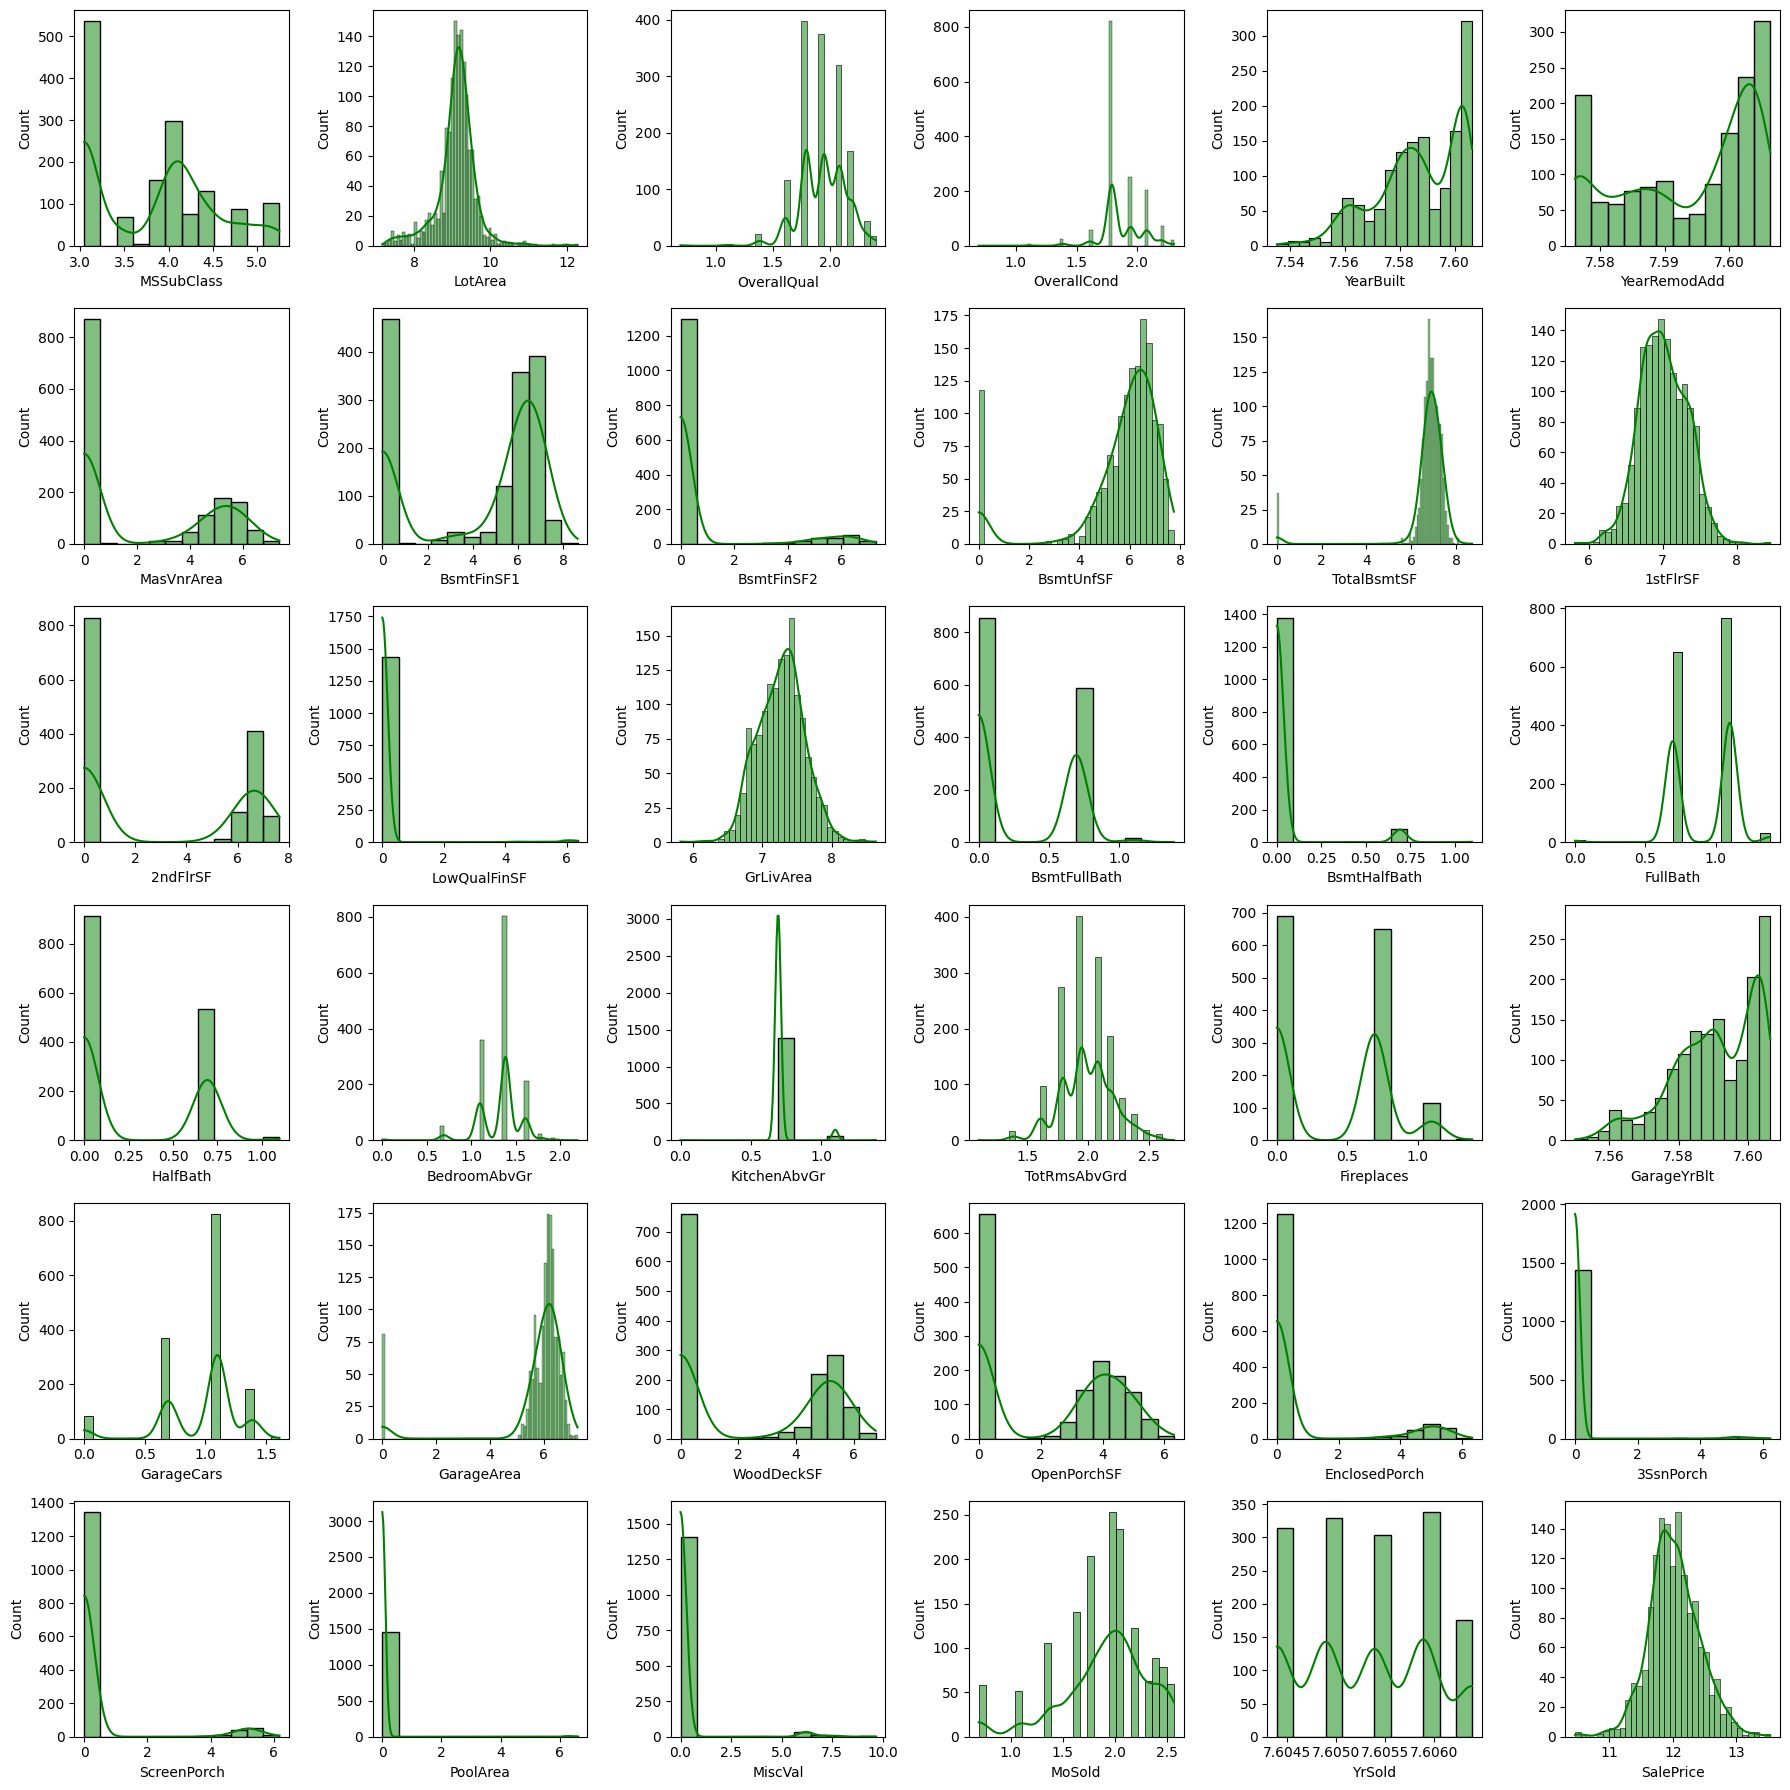

In [30]:
#show histplot visualitation for all numeric variabel
plt.figure(figsize=(18, 18)) #make a figure to histplot place with size that needed. In this case wide=18 and long=18
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(6, 6, i+1) #make histplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    sns.histplot(df[nums[i]], color='green', kde=True) #show histplot for each variabel  with green color, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan histplot data di atas, diketahui tidak terdapat variabel yang memiliki nilai bentuk histogram yang simetris sempurna sehingga dapat dikataan tidak terdapat data yang berdistribusi normal. Namun, terlihat terdapat beberapa data yang memiliki bentuk cukup simetris seperti variabel `SalePrice`, `LotArea`, `GrLivArea`, dan `1stFlrSF`. Untuk memastikan apakah dalam tingkat toleransi/ taraf signifikansi tertentu data tersebut dikatakan berdistribusi normal, perlu dilakukan uji hipotesis salah satunya kolmogrov smirnov.

In [31]:
#Uji Kolmogrov-Smirnov
for col in nums:
  z = kstest(df[col], "norm")
  print(f"KS-test {col} :")
  print(z)

KS-test MSSubClass :
KstestResult(statistic=0.9988347497726293, pvalue=0.0, statistic_location=3.044522437723423, statistic_sign=-1)
KS-test LotArea :
KstestResult(statistic=0.9999999999996274, pvalue=0.0, statistic_location=7.170888478512505, statistic_sign=-1)
KS-test OverallQual :
KstestResult(statistic=0.929116401877104, pvalue=0.0, statistic_location=1.6094379124341003, statistic_sign=-1)
KS-test OverallCond :
KstestResult(statistic=0.925006812836008, pvalue=0.0, statistic_location=1.6094379124341003, statistic_sign=-1)
KS-test YearBuilt :
KstestResult(statistic=0.9999999999999757, pvalue=0.0, statistic_location=7.5352967024440884, statistic_sign=-1)
KS-test YearRemodAdd :
KstestResult(statistic=0.9999999999999822, pvalue=0.0, statistic_location=7.576097340623111, statistic_sign=-1)
KS-test MasVnrArea :
KstestResult(statistic=0.5, pvalue=0.0, statistic_location=0.0, statistic_sign=-1)
KS-test BsmtFinSF1 :
KstestResult(statistic=0.6771479238611303, pvalue=0.0, statistic_location=2.

Berdasarkan output di atas, diketahui bahwa tidak terdapat variabel yang meiliki nilai p-value di atas nilai traf signifikansi yang biasa digunakan yaitu 0,05. Oleh karena itu, dapat dikatakan bahwa data memang tidak ada yang berdistribusi normal.



---
**Object Variabels Analysis**



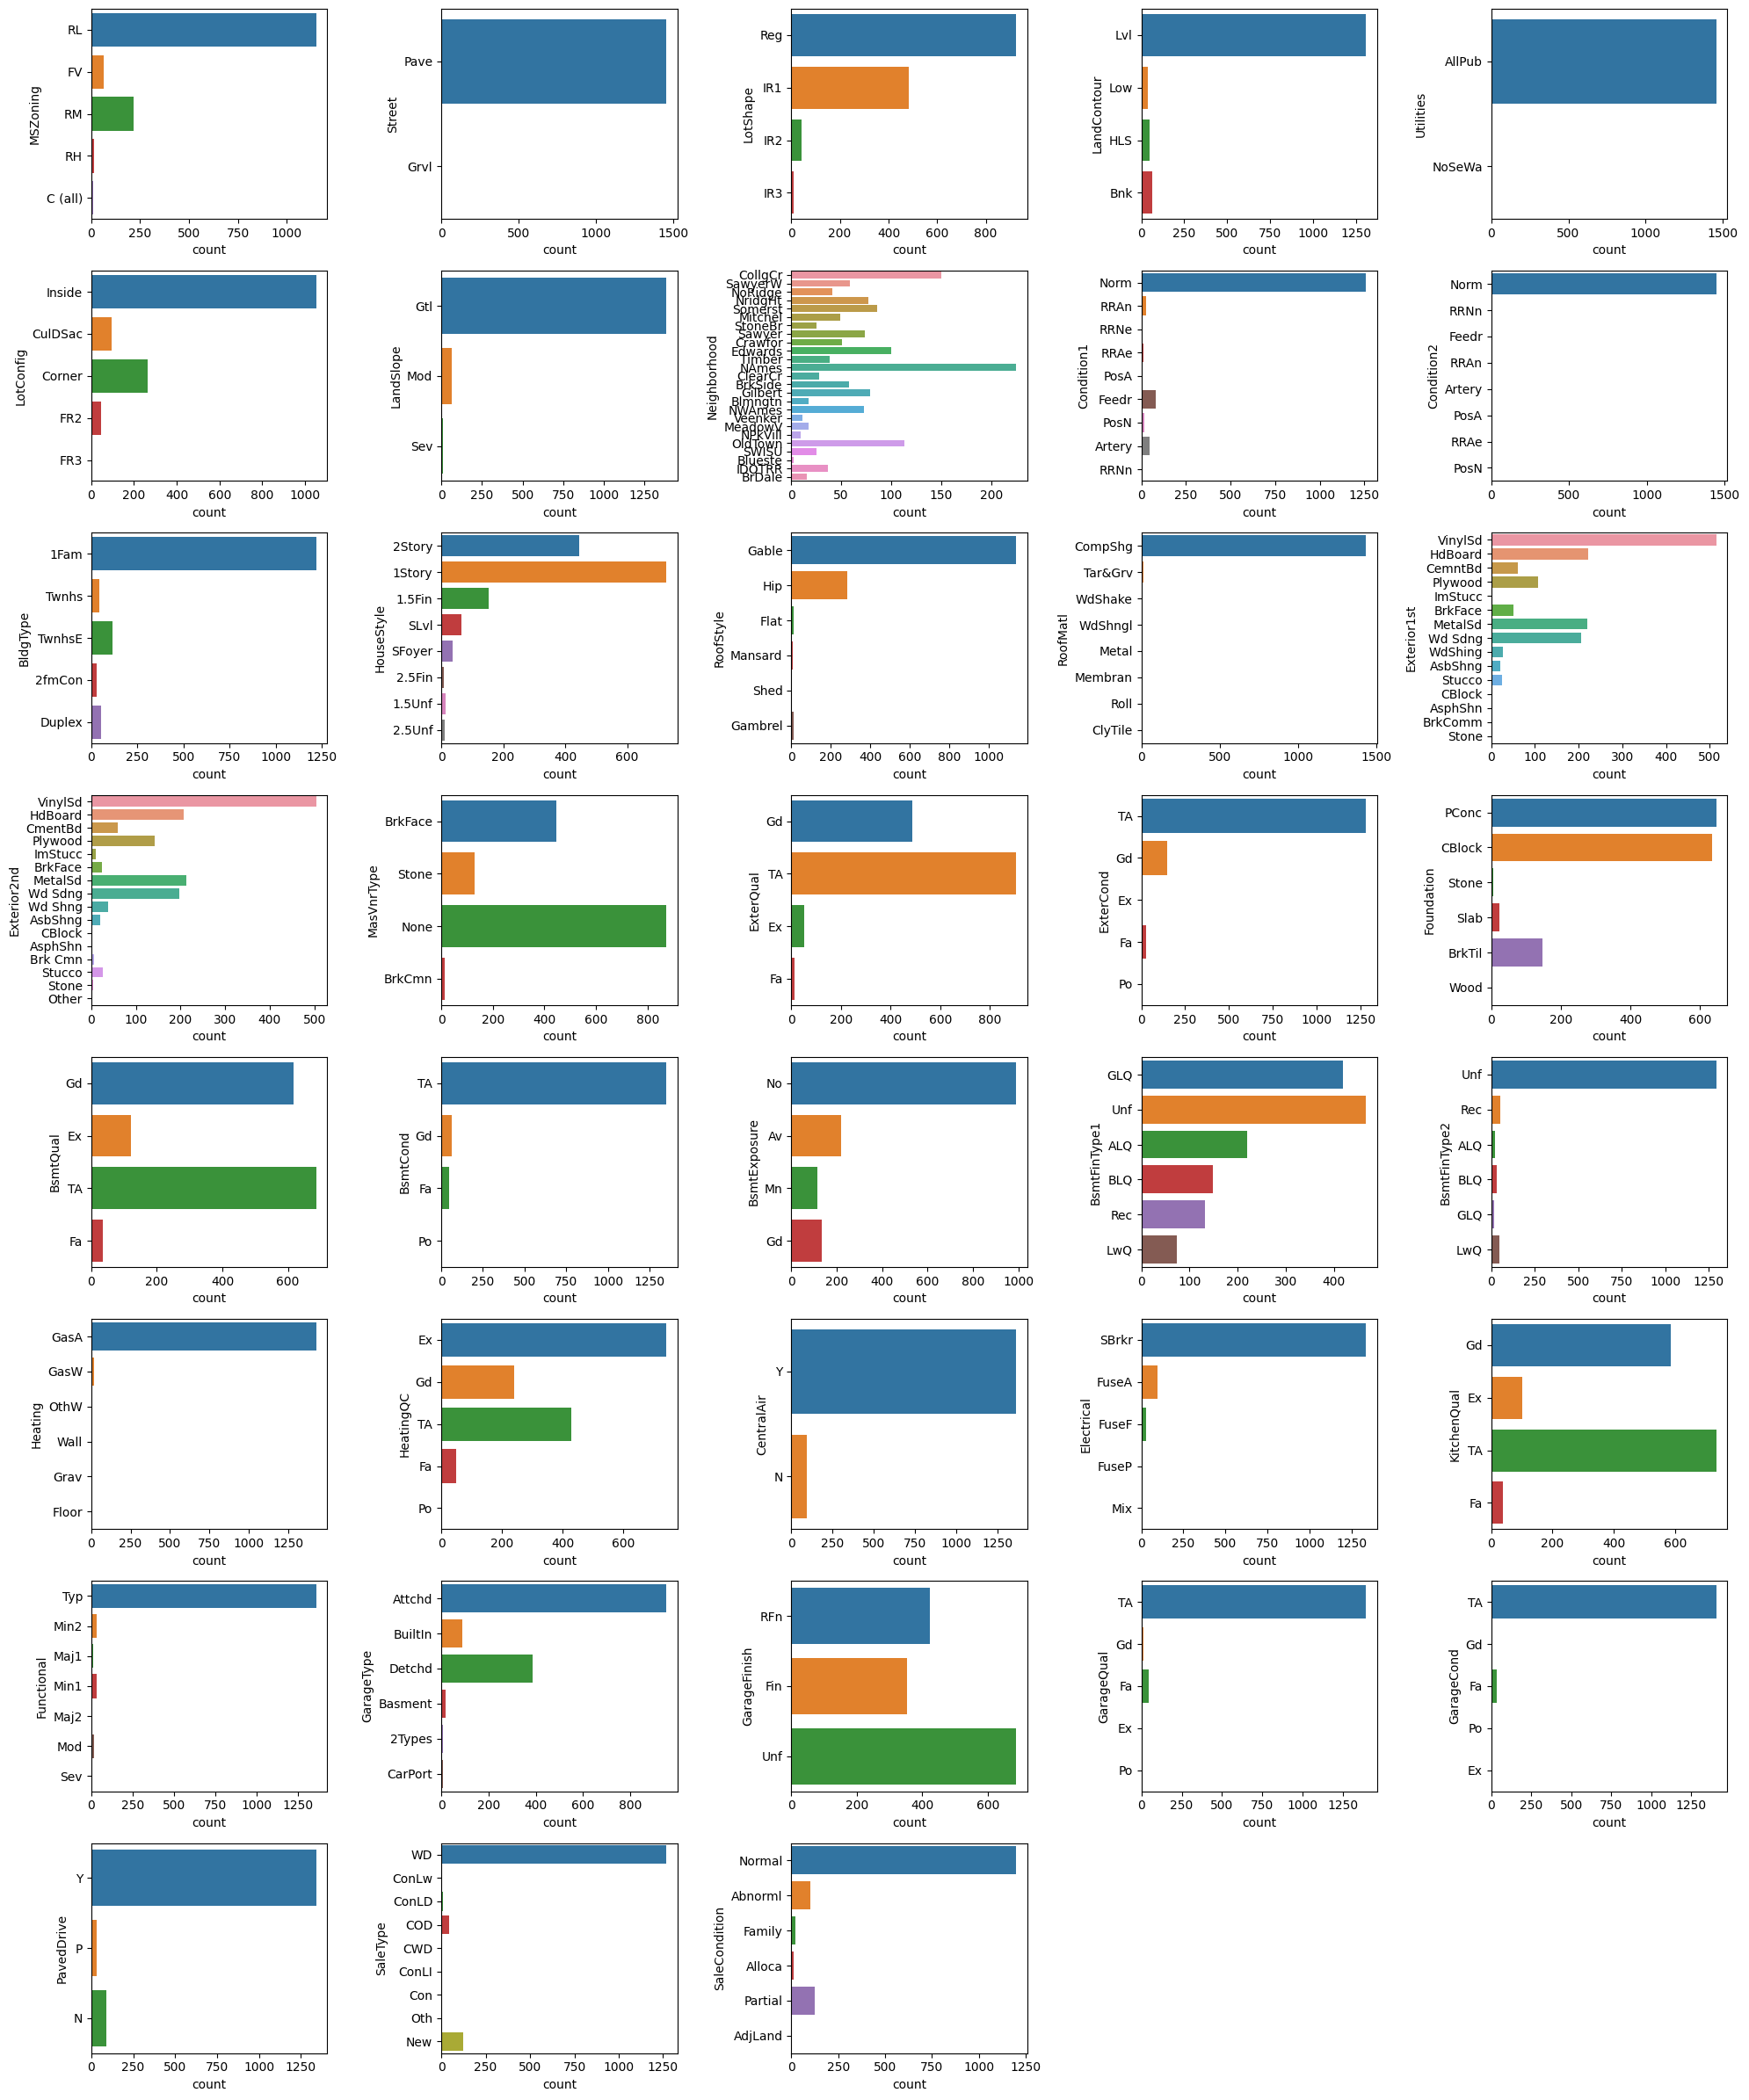

In [32]:
#show countplot visualitation for all categoric variabel
plt.figure(figsize=(20, 24)) #make a figure to histplot place with size that needed. In this case wide=24 and long=20
for i in range(0, len(cats)): #looping according to count of variabel of 'cats'.
    plt.subplot(8, 5, i+1) #make subplot in figure with size that needed. In this case 8 row 5 colums because there are 38 variabels.
    sns.countplot(y = df[cats[i]])#show countplot for each variabel.
    plt.tight_layout()  #make visualitation to good image if downloaded

Berdasarkan output di atas terlihat bahwa terjadi ketimpangan distribusi pada hampir semua variabel kecuali variabel `GarageFinish`, `BsmtFinType1`, `Neighborhood` yang memiliki distribusi yang tidak terlalu berbeda antar unique nya.

###5.Multivariate Analysis

In [33]:
#show scatterplot visualitation for all numeric variabel by SalePrice
plt.figure(figsize=(60, 60)) #make a figure to scatterplot place with size that needed. In this case wide=60 and long=60
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(6, 6, i+1) #make scatterplot in figure with size that needed. In this case 6 row 6 colums because there are 36 variabels.
    sns.scatterplot(df, x=nums[i], y='SalePrice') #show scatterplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Output hidden; open in https://colab.research.google.com to view.

In [34]:
#show correlation all variabel by 'SalePrice' as a dataframe
pd.set_option('display.max_rows', 100)
df_corr_SalePrice=df.corr()['SalePrice'].sort_values(ascending=False).reset_index()
df_corr_SalePrice

,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.802067
2,GrLivArea,0.730254
3,GarageCars,0.641561
4,1stFlrSF,0.608955
5,YearBuilt,0.584443
6,FullBath,0.580297
7,YearRemodAdd,0.565590
8,TotRmsAbvGrd,0.539998
9,Fireplaces,0.508925


Berdasarkan output scatterplot dan nilai korelasi di atas, diketahui bahwa variabel `SalePrice` memiliki koelasi yang cukup kuat (>0,6) secara positif dengan variabel `OverallQual`, `GrLivArea`, `GarageCars`, dan `1stFlrSF`. Sementara, tidak terdapat variabel yang memiliki korelasi negatif yang cukup kuat dengan variabel `SalePrice`.

##**Multiple Linear Regression Model**

###1.Model Regression

Berdasarkan Data Understanding, dengan variabel target `SalePrice` diketahui bahwa tidak terdapat data yang berdistribusi normal. Distribusi normal, sebenarnya meruapakan syarat yang perlu dipenuhi untuk dapat dilakukan pemodelan regresi. Namun, pada analisis kali ini distribusi yang tidak normal akan di abaikan. 

Pemodelan regresi pada analisis kali ini hanya dapat dilakukan untuk variabel-variabel numerik. Sementara, variabel-variabel kategorik memerlukan metode lain.

Dataset memiliki variabel dengan jumlah yang cukup banyak, oleh karena itu pemodelan regresi dilakukan dengan menggunakan variabel bebas yang memiliki korelasi cukup kuat dengan variabel y. Berdasarkan proses data understanding, diketahui pula bahwa data yang memiliki korelasi cukup kuat dengan variabel `Saleprice` adalah variabel `OverallQual`, `GrLivArea`, `GarageCars`, dan `1stFlrSF` dengan nilai korelasi terhadap variabel `SalePrice` di atas 0,6. 

In [ ]:
df[['OverallQual','GrLivArea', 'GarageCars', '1stFlrSF','SalePrice']].head()

,OverallQual,GrLivArea,GarageCars,1stFlrSF,SalePrice
0,2.079442,7.444833,1.098612,6.753438,12.247699
1,2.079442,7.491645,1.098612,6.871091,12.352339
2,2.079442,7.478170,1.098612,6.785588,12.323416
3,2.197225,7.645398,1.098612,7.107425,12.388398
4,2.079442,7.512071,1.098612,6.848005,12.375820


In [ ]:
#definition variable
X = df[['OverallQual','GrLivArea', 'GarageCars', '1stFlrSF']] #predicted variable
Y = df['SalePrice'] #response variable

Dilakukan pendefinisian variabel dimana X berisi 4 variabel bebas/predictor dan Y adalah variabel respon

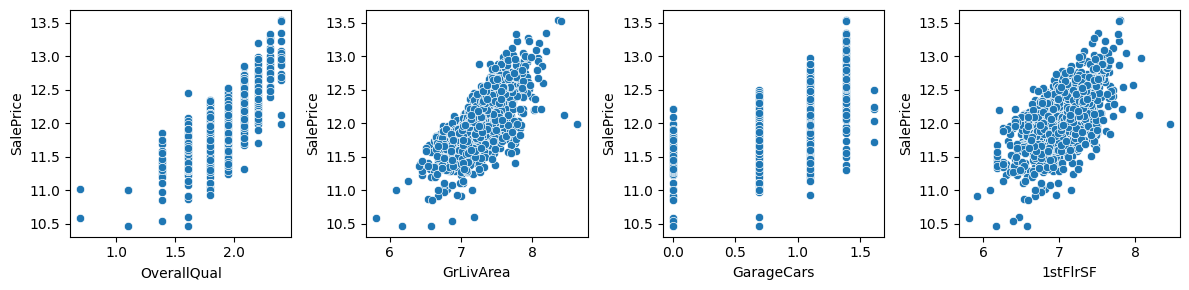

In [ ]:
#show scatterplot visualitation for all numeric variabel by SalePrice
plt.figure(figsize=(12, 3)) #make a figure to scatterplot place with size that needed. In this case wide=60 and long=60
for i in range(0, len(X.columns)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 4, i+1) #make subplot in figure with size that needed. In this case 1 row 4 colums because there are 4 variabels.
    sns.scatterplot(df, x=X.columns[i], y='SalePrice') #show scatterplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas diketahui bahwa antara keempat variabel x memiliki hubungan linearitas yang baik terhadap variabel y. Plot menunjukkan korelasi positif yang berarti bahwa apabila nilai variabel predictor semakinn tinggi maka variael respon juga meningkat. Korelasi linear yang kuat ini dapat mengindikasikan bahwa model yang akan terbentuk dari variabel respon dan predictor tersebut akan memiliki tingkat keakuratan yang baik.

---

Sebelum dilakukan pemodelan, perlu dilakukan pemisahan data antara data training dan testing. Pemisahan data training dengan testing adalah teknik preprocessing data untuk mengevaluasi kinerja model yang telah dibentuk. Train merupakan data yang digunakan dalam pembentukan model sementara test merupaan data yang digunakan dalam mengevaluasi model. 

Pemisahan data Train dan Test dilakukan dengan menggunakan function `train_test_split` dari sklearn package.


In [ ]:
#Train Test Split
train_X, test_X, train_y, test_y = train_test_split(X,Y,test_size=0.2, random_state= 0)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1168, 4)
(1168,)
(292, 4)
(292,)


Berdasarkan output di atas diketahui hasil pemisahan dari train test split yang terdiri dari 1168 nilai data train dan 292 nilai data test.



---
Setelah dilakukan train test split, maka dapat dilakukan pemodelan regresi dengan menggunakan function `LinearRegression` pada data train.


In [ ]:
#Regression Models
train_X0 = train_X #variabel predictor
train_y0 = train_y #variabel respon
model = LinearRegression().fit(train_X0, train_y0)

#Intercept
b0 = round(float(model.intercept_),4)
print('intercept (b0 ) : ', b0) #show intercept

#beta
for i in range(len(X.columns)):
  b = round(float(model.coef_[i]),4) #looping koefisien predictor
  print(f"slope (b{i+1}) :", b) #show koefisien

intercept (b0 ) :  6.1137
slope (b1) : 0.8806
slope (b2) : 0.3232
slope (b3) : 0.2386
slope (b4) : 0.231


Berdasarkan output di atas maka diperoleh model regresi:

y = 6.1137 + 0.8806(OverallQual) + 0.3232(GrLivArea) + 0.2386(GarageCars) + 0.2310(1stFlrSF)

Model tersebut  berarti apabila terjadi kenaikan satu satuan pada variabel OverllQual maka terjadi kenaikan sebesar 0.8806 pada variabel y. Apabila terjadi kenaikan satu satuan pada variabel GrLivArea maka terjadi kenaikan 0.3232 pada variabel y. Apabila terjadi kenaikan satu satuan pada variabel GarageCars maka terjadi kenaikan 0.2386 pada variabel y. Apabila terjadi kenaikan satu satuan pada variabel 1stFlrSF maka terjadi kenaikan 0.2310 pada variabel y. Sementara, apabila seluruh variabel predictor mengalami nilai 0 maka variabel y memiliki nilai 6.1137


---
Setelah diperoleh model regresi maka dapat dilakukan evaluasi model untuk mengetahui seberapa baik model yang telah terbentuk dalam memprediksi.


###2.Model Evaluation (Metric Evaluation)



Model Evaluation dilakukan dengan menampilkan nilai r-squared model yang dibentuk untuk menunjukkan seberapa baik model yang telah dibuat. Namun, akan lebih mudah dalam menginterpretasikan hasil evaluasi apabila dilakukan dengan menampilkan nilai error dari hasil prediksi y dengan menggunakan model regresi yang telah dibentuk untuk menunjukkan seberapa jauh kesalahan yang terbentuk apabila dilakukan prediksi dengan model yang telah ada.

Terdapat beberapa jenis perhitungan error yang dapat digunakan:
- MAE
- RMSE
- MAPE

---
Sebelum dilakukan evaluasi model, dihitung terlebih dahulu nilai prediksi dari model yang telah diperoleh menggunakan variabel testing. Hal tersebut diperuntukkan untuk perhitungan ukuran error dalam evaluasi model. Perhitungan dapat dilakukan dengan menggunakan function `predict`.


In [ ]:
#show predicted result of regreession model
linregpred = model.predict(test_X)
print(linregpred[0:5])
print(len(linregpred))

[12.20971132 11.81213189 12.30793726 12.09291198 11.64383306]
292


Berdasarkan output di atas telah diperoleh nilai y prediksi dari variabel x testing.

####a.R-Squared

Merupakan nilai yang menunjukkan seberapa baik model yang dihasilkan. Nilai R-Squared apat diperoleh dengan menggunakan function `r2_score` pada sklearn package.

Nilai R-Squared dihitung dengan menggunakan data training karena merepresentasikan kualitas model yang dibentuk.

In [ ]:
#R-Squared
print('R-squared for training data is: {}'.format(r2_score(train_y, model.predict(train_X))))

R-squared for training data is: 0.7901346217739268


Berdasarkan output R-Squared di atas diperoleh nilai 0.7901

Nilai tersebut berarti bahwa sebesar 79.01% variabel respon dipengaruhi oleh variabel predictor sementara sisanya 20.99% dipengaruhi oleh faktor lain. Nilai r-squared yang tinggi mengindikasikan model yang diperoleh bagus.

####b.MAE & RMSE

Nilai MAE merupaan ukuran error yang diperoleh dari rata-rata selisih mutlak nilai sesungguhnya dengan nilai prediksi.Sementara nilai RMSE merupakan akara dari rata-rata selisih kuadrat nilai sesungguhnya dengan nilai prediksi.

Kedua nilai tersebut merupakan indikator error yang dapat menunjukkan kualitas hasil prediksi dari model yang telah dibentuk. Semakin nilai MAE dengan nilai RMSE memiliki jarak/ range yang dekat maka hasil prediksi dari model yang terbentuk semakin mendekati nilai sesungguhnya.

Nilai MAE dapat diperoleh dengan menggunakan function `mean_absolute_error` dari sklearn package, sementara nilai RMSE dapat diperoleh dengan menggunakan function `mean_squared_error` dari sklearn package.

In [ ]:
#MAE
print('MAE for training data is: {}'.format(np.sqrt(mean_absolute_error(train_y, model.predict(train_X)))))
print('MAE for testing data is: {}'.format(np.sqrt(mean_absolute_error(test_y, model.predict(test_X)))))
#RMSE
print('RMSE for training data is: {}'.format(np.sqrt(mean_squared_error(train_y, model.predict(train_X), squared=False))))
print('RMSE for testing data is: {}'.format(np.sqrt(mean_squared_error(test_y, model.predict(test_X), squared=False))))

MAE for training data is: 0.3646593321209195
MAE for testing data is: 0.35726655041433175
RMSE for training data is: 0.42798485834606925
RMSE for testing data is: 0.41618462216113933


Berdasarkan output diketahui bahwa nilai MAE dengan RMSE baik pada data training dan testing tidak memiliki jarak yang jauh. Hal tersebut berarti bahwa nilai hasil prediksi tidak terlalu jauh dari nilai actualnya.

Berdasarkan output dihasilkan nilai MAE pada data testing sebesar 0,3573. Hal tersebut menunjukkan bahwa nilai actual berada pada selisih +- 0,3573

####c.MAPE
Merupakan ukuran error yang dihasilkan dari rata-rata nilai persentase mutlak seilish nilai actual dengan prediksi.

MAPE merupakan nilai yang dapat menunjukkan kualitas hasil prediksi dengan menghasilkan nilai presentase esalahan hasil prediksi dari model yang telah dibentuk. Kriteria nilai MAPE sesuai kualitas prediksi adalah sebagai berikut:
- kurang dari 10% hasil prediksi sangat akurat
- 10% hingga 20% hasil prediksi baik
- 20% hingga 50% hasil prediksi cukup aik
- lebih dari 50% hasil prediksi tidak akurat.

Nilali MAPE dapat diperoleh dengan function `mean_Absolute_percentage_error` pada sklearn package.


In [ ]:
#MAPE
print('MAPE for training data is: {}'.format(np.sqrt(mean_absolute_percentage_error(train_y, model.predict(train_X)))))

MAPE for training data is: 0.10549031738353692


Berdasarkan output di atas diperoleh nilai MAPE sebesar 0.1054

Hal tersebut berarti model akan menghasilkan prediksi yang memiliki error sebesar 10.54%. Nilai tersebut termasuk dalam kategori model yang menghasilkan prediksi yang baik.

###3.Hasil Prediksi Actual



Hasil prediksi dari model yang telah dibentuk dapat dihitung dengan menggunakan function `predict` dari sklearn package yang sebelumnya juga telah dilakukan. 
Setelah diperoleh hasil nilai prediksi, perlu dilakukan `proses pengembalian transformasi`. Setelah dilakukan proses outlier handling menggunakan log transformation sebelumnya, tentu data telah mengalami perubahan nilai sehingga hasil prediksi tidak menampilkan nilai data `SalePrice` yang sesungguhnya. Oleh karena itu, untuk dapat mengetahui nilai prediksi data sesungguhnya perlu dilakukan pengembalian transformasi.

Karena transformasi data dilakukan dengan menggunakan fungsi logaritma. Maka, Pengembalian transformasi dilakukan dengan meng-exponensialkan nilai data. 

In [ ]:
#show predicted result of regreession model
linregpred = model.predict(test_X)
print(linregpred[0:30])
print(len(linregpred))

[12.20971132 11.81213189 12.30793726 12.09291198 11.64383306 12.17677276
 12.18805657 11.3858085  11.87539752 11.76135371 11.92261876 11.76569146
 11.75554824 12.52645011 11.98067479 11.57814026 12.01997803 12.15696413
 12.40551174 12.32346011 12.18454749 12.03259744 12.26053528 11.62388447
 12.0447884  11.80862788 12.36017818 11.94648193 12.07549615 12.05984743]
292


In [ ]:
from tables.tests.test_suite import test
#show y prediction values before anti-transformation
print("Prediction Value Before Anti-Transfrom")
print(linregpred[0:5])
print("")

#show actual y values before anti-transformation
print("Actual Value before Anti-Transfrom")
print(test_y[0:5])
print("")

#show test_X variabels before anti-transformation
print("X Value before Anti-Transfrom")
print(test_X[0:5])
print("")

#AntiLog 
for i in range(0, len(linregpred)):
  linregpred[i] = np.exp(linregpred[i]+1)
for i in test_X:
  test_X[i] = np.exp(test_X[i]+1)
test_y = np.exp(test_y+1)

#show y prediction values after anti-transformation
print("Prediction Value After Anti-Transfrom")
print(linregpred[0:5])
print("")

#show actual y values after anti-transformation
print("Actual Value After Anti-Transfrom")
print(test_y[0:5])
print("")

#show test_X variabels After anti-transformation
print("X Value After Anti-Transfrom")
print(test_X[0:5])
print("")

Prediction Value Before Anti-Transfrom
[12.20971132 11.81213189 12.30793726 12.09291198 11.64383306]

Actual Value before Anti-Transfrom
529    12.299112
491    11.901590
459    12.531776
279    11.842236
655    11.792457
Name: SalePrice, dtype: float64

X Value before Anti-Transfrom
     OverallQual  GrLivArea  GarageCars  1stFlrSF
529     2.079442   7.564757    1.098612  6.742881
491     1.791759   7.136483    0.693147  7.136483
459     2.079442   7.631917    1.098612  7.074117
279     1.945910   7.398174    0.693147  7.398174
655     1.609438   6.947937    1.098612  6.947937

Prediction Value After Anti-Transfrom
[545638.15793316 366638.59737717 601954.57152923 485489.03275064
 309846.73900071]

Actual Value After Anti-Transfrom
529    596665.579629
491    400949.287980
459    752966.784765
279    377843.892438
655    359495.490096
Name: SalePrice, dtype: float64

X Value After Anti-Transfrom
     OverallQual    GrLivArea  GarageCars     1stFlrSF
529    21.746255  5243.565647    8.1

Berdasarkan output di atas diperoleh nilai prediksi aktual dari variabel `SalePrice`. Dengan menggunakan model yang dibentuk, dapat diprediksi harga rumah berdasarkan nilai dari setiap variabel penentu harga. Contoh:

Untuk rumah dengan nilai `OverallQuall` sebesar 21.746255, nilai `GrLiveArea` 5243.565647, nilai `GarageCars` 8.154845, dan nilai `1stFlrSF` 2305.102991 maka dapat diprediksi bahwa rumah tersebut akan dijual dengan harga 545638.15793316

Namun sesungguhnya harga rumah tersebut adalah 596665.579629

Selisih Harga rumah sesungguhnya dengan prediksi sebesar 51027.42169584008. Nilai tersebut sesuai dengan nilai MAPE yang dihasilkan yakni 10.54% dari data actual



##**Kesimpulan**

Berdasarkan analisis data dan pemodelan regresi yang telah dilakukan dapat disimpulkan bahwa:
- Dari seluruh variabel yang ada pada dataset, variabel - variabel yang memiliki korelasi yang cukup kuat terhadap variabel target `SalePrice` adalah variabel `OverallQual`, `GrLivArea`, `GarageCars`, dan `1stFlrSF` dengan nilai korelasi terhadap variabel `SalePrice` di atas 0,6.
- Pembentukan model regresi dari keempat variabel predictor terhadap variabel target `SalePrice` dihasilkan model: 

    y = 6.1137 + 0.8806(OverallQual) + 0.3232(GrLivArea) + 0.2386(GarageCars) + 0.2310(1stFlrSF)
- Model yang terbentuk memiliki akurasi korelasi sebesar 79.01% dan kesalahan prediksi sebesar 10.54% 
- Contoh hasil prediksi `SalePrice` menggunakan model yang terbentuk yakni sebagai berikut:
    
    Untuk rumah dengan nilai `OverallQuall` sebesar 21.746255, nilai `GrLiveArea` 5243.565647, nilai `GarageCars` 8.154845, dan nilai `1stFlrSF` 2305.102991 maka dapat diprediksi bahwa rumah tersebut akan dijual dengan harga 545638.15793316. Namun sesungguhnya harga rumah tersebut adalah 596665.579629. Selisih Harga rumah sesungguhnya dengan prediksi sebesar 51027.42169584008. Nilai tersebut sesuai dengan nilai MAPE yang dihasilkan yakni 10.54% dari data actual

#**K-Means Clustering Model**

##**Import Package**


In [ ]:
#importing package from libraries
import warnings
warnings.filterwarnings("ignore") #for ignore not important warnings
import numpy as np #for saintific process
import pandas as pd #for dataframe processing
import seaborn as sns #for data visualitation
import matplotlib.pyplot as plt #for data visualitation
%matplotlib inline
from scipy.stats import kstest #for kolmogrov smirnov test
from sklearn.preprocessing import StandardScaler #for scalling
from sklearn.model_selection import train_test_split #for train test split
from sklearn.cluster import KMeans #for clustering
from sklearn.metrics import silhouette_score #for get count of cluster
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score #for model evaluation

In [ ]:
from google.colab import drive #for connect to drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Data Understanding**

###1.Dataframe Identification

Analisis data ini bertujuan untuk melakukan segmentasi customer sebuah mall dengan indikator tertentu dengan metode K-Means Clustering.

Variabel yang ada dalam dataset, diantaranya:
- `CustomerID` menunjukan identitas pelanggan mall 
- `Gender` menunjukan jenis kelamin pelanggan mall
- `Age` menujukan umur pelanggan mall
- `Annual Income` menunjukan pendapatan tahunan pelanggan mall
- `Spending Score` menunjukan skor yang diberikan oleh mall berdasarkan perilaku pelanggan dan sifat belanja

In [ ]:
#load data train 
pd.set_option('display.max_columns', 200)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#show shape
df.shape

(200, 5)

Berdasarkan output diketahui pada dataframe terdapat 5 kolom dan 200 baris.

In [ ]:
#show columns to know all variabel in dataframe
print(df.columns)
print(len(df.columns))

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Berdasarkan output diketahui bahwa dataframe terdiri dari 4 variabel numerik dan 1 variabel kategorik. Diketahui pula bahwa tidak terdapat Missing Value pada data. 

Selain itu, diketahui juga terdapat variabel `CustomerID` yang sebenarnya merupakan variabel yang tidak diperlukan dalam analisis karena hanya menampilkan Id Pelanggan. Sehingga, dapat dilakukan penghapusan variabel `CustomerID`.  

### 2.Cleaning & Handling Dataframe


Berdasarkan identifikasi data yang telah dilakukan, akan dilakukan cleaning & handling data berupa:
- Menghapus kolom `CustomerID`
- Categorical Data Encoding
- Outlier Checking & Handling

####a.Penghapusan kolom `Id`

In [ ]:
#drop irrelevant columns
df=df.drop(columns=['CustomerID'])
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Berdasarkan output di atas, diketahui bahwa sudah tidak ada kolom `CustomerID` pada dataframe.

####b.Categorical Data Encoding

Sebelum melakukan analisis, akan dilakukan pengelompokan data berdasarkan tipe data numerik dan kategori. Mengingat bahwa analisis data memiliki proses yang berbeda untuk tipe data yang berbeda, hal ini bertujuan agar dapat melakukan analisis yang lebih efisien karena variabel yang memiliki tipe data yang sama dikelompokkan menjadi satu.

In [ ]:
#grouping data as numeric and categoric 
cats=[i for i in df.columns if df[i].dtypes == 'object'] 
nums=[i for i in df.columns if df[i].dtypes != 'object']
print(nums)
print(len(nums))
print(cats)
print(len(cats))

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
3
['Gender']
1


Berdasarkan output di atas, diketahui bahwa variabel kategorikal telah dikelompokkan menjadi `cats` dan variabel numerik telah dikelompokkan menjadi `nums`.

In [ ]:
#Categorical Data Encoding
dum_Gender = pd.get_dummies(df['Gender'],prefix='Gender')
df = pd.concat([df, dum_Gender], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0


Berdasarkan output hasil encoding data menggunakan metode one hot encoding di atas, terlihat bahwa telah terbentuk variabel numerik dari gender untuk tiap unique.

####c.Outlier Checking & Handling

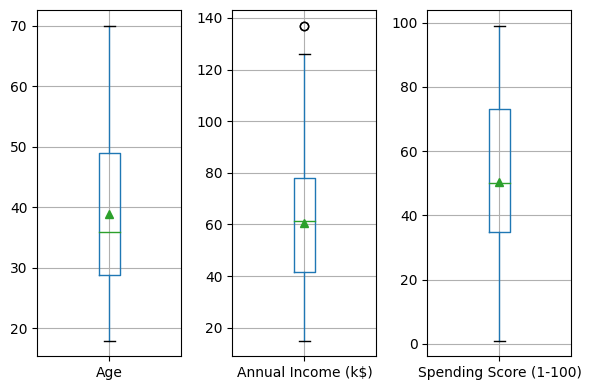

In [ ]:
#show boxplot visualitation for all numeric variabel to know outliers
plt.figure(figsize=(6,4)) #make a figure to boxplot place with size that needed. In this case wide=6 and long=4
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row, 3 colums because there are 3 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas diketahui bahwa semua variabel data memiliki distribusi yang dapat dikatakan baik karena tidak banyak terdapat outlier pada setiap variabel. 

Diketahui pula bahwa:
- Variabel `Age` memiliki distribusi dengan right skewness karena nilai mea>median atau upper whisker lebih panjang dari bottom whisker.
- Variabel `Annual Income` memiliki distribusi dengan sedikit left skewness karena nilai mean<median atau bottopm whisker lebih panjang dari upper whisker. Diketahui pula bahwa variabel ini memiliki satu outliers. maka perlu dilakukan Outlier Handling.
- Variabel `Spending Score` memiliki distribusi yang baik karena nilai median terlihat sama dengan nilai mean. Atau dapat dikatakan bahwa data variabel tersebut mungkin berdistribusi normal.

Untuk memastikan distribusi dari tiap variabel data, perlu ditampilkan histplot untuk mengetahui bentuk distribsui.

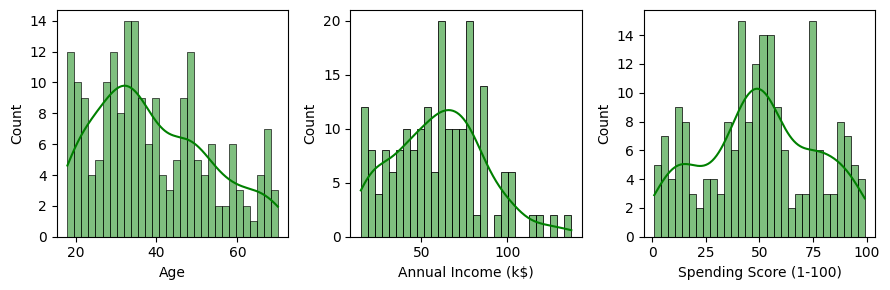

In [ ]:
#show histplot visualitation for all numeric variabel to know distribution of each variabels
plt.figure(figsize=(9,3)) #make a figure to histplot place with size that needed. In this case wide=9 and long=3
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row 3 colums because there are 3 variabels.
    sns.histplot(df[nums[i]], color='green', bins=30, kde=True) #show histplot for each variabel  with green color,, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas diketahui bahwa variabel `Age` memiliki right skewness, variabel `Annual Income` memiliki left skewness, dan variabel `Spending Score`. Memiliki bentuk histplot yang simetris.

Berdasarkan output boxplot dan histplot di atas, karena data memiliki distribusi yang baik namun terdapat outlier pada variabel `Annual Income` sehingga perlu dilakukan outliers handling.

Jumlah baris sebelum handling outlier: 200
Jumlah baris setelah memfilter outlier: 198


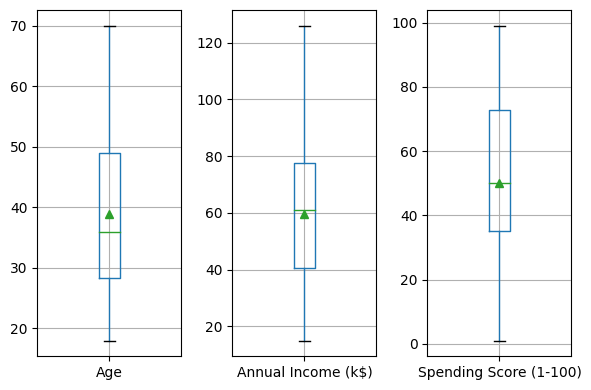

In [ ]:
#dropna for row that have outtlier
print('Jumlah baris sebelum handling outlier:', len(df))
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df['Annual Income (k$)'] >= low_limit) & (df['Annual Income (k$)'] <= high_limit))
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier:', len(df))

#show boxplot visualitation for all numeric variabel to know outliers
plt.figure(figsize=(6,4)) #make a figure to boxplot place with size that needed. In this case wide=6 and long=4
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row, 3 colums because there are 3 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas dapat diketahui bahwa sudah tidak terdapat outlier pada variabel `Annual Income` dan jumlah baris data setelah dilakukan outlier handling adalah 198.

###3.Statistical Summary

In [ ]:
#show statistics summary for numeric variabel
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,198.0,38.929293,14.016852,18.0,28.25,36.0,49.00,70.0
Annual Income (k$),198.0,59.787879,25.237259,15.0,40.50,61.0,77.75,126.0
Spending Score (1-100),198.0,50.196970,25.746846,1.0,35.00,50.0,72.75,99.0


In [ ]:
#calculate limit 
for i in nums:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  print(f"LIMIT OF {i} =")
  print("low_limit:", low_limit)
  print("high_limit:", high_limit)
  print("------------------------------")

LIMIT OF Age =
low_limit: -2.875
high_limit: 80.125
------------------------------
LIMIT OF Annual Income (k$) =
low_limit: -15.375
high_limit: 133.625
------------------------------
LIMIT OF Spending Score (1-100) =
low_limit: -21.625
high_limit: 129.375
------------------------------


Berdasarkan output di atas diketahui bahwa:
- Variabel `Age` memiliki nilai mean>median yang berarti bahwa data memiliki right skewness. 
Diketahui pula bahwa variabel `Age` tidak memiliki outlier karena nilai minimal dan maksimal data masih dalam range nilai low limit dan high limit.
- Variabel `Annual Income` memiliki nilai median>mean yang berarti bahwa data memiliki left skewness. Diketahui pula bahwa variabel `Annual Income` tidak memiliki outlier karena nilai minimal dan maksimal data masih dalam range nilai low limit dan high limit.
- Variabel `Spending Score` memiliki nilai mean>median meskipun hanya memiliki selisih yang sangat seidikit yang berarti data memiliki distribusi right skewness. Diketahui pula bahwa variabel `Spending Score` tidak memiliki outlier karena nilai minimal dan maksimal data masih dalam range nilai low limit dan high limit.


In [ ]:
#show statistics summary for categorical variabel
df[cats].describe().T

,count,unique,top,freq
Gender,198,2,Female,112


Berdasarkan output di atas diketahui bahwa frekuensi gender dari pelanggan yang paling banyak adalah `Female` atau `Perempuan` yaitu sebanyak 112 dari 200 data.

###4.Univariate Analysis

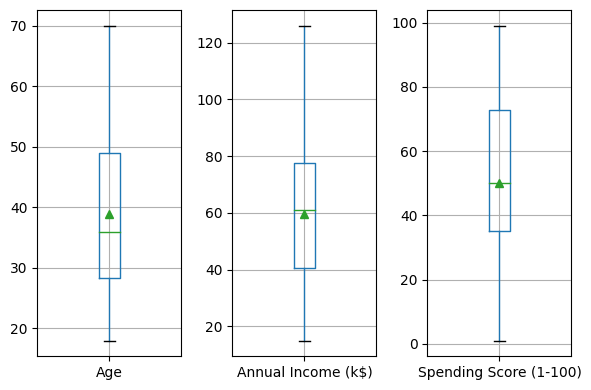

In [ ]:
#show boxplot visualitation for all numeric variabel to know outliers
plt.figure(figsize=(6,4)) #make a figure to boxplot place with size that needed. In this case wide=6 and long=4
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'. 
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row, 3 colums because there are 3 variabels.
    df.boxplot(column=nums[i], vert=True, showmeans=True) #show boxplot for each variabel to become 'y' with vertical oriented.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas diketahui bahwa semua variabel data memiliki distribusi yang dapat dikatakan baik karena tidak banyak terdapat outlier pada setiap variabel. 

Diketahui pula bahwa:
- Variabel `Age` memiliki distribusi dengan right skewness karena nilai mea>median atau upper whisker lebih panjang dari bottom whisker.
- Variabel `Annual Income` memiliki distribusi dengan sedikit left skewness karena nilai mean<median atau bottopm whisker lebih panjang dari upper whisker.
- Variabel `Spending Score` memiliki distribusi yang baik karena nilai median terlihat sama dengan nilai mean. Atau dapat dikatakan bahwa data variabel tersebut mungkin berdistribusi normal.

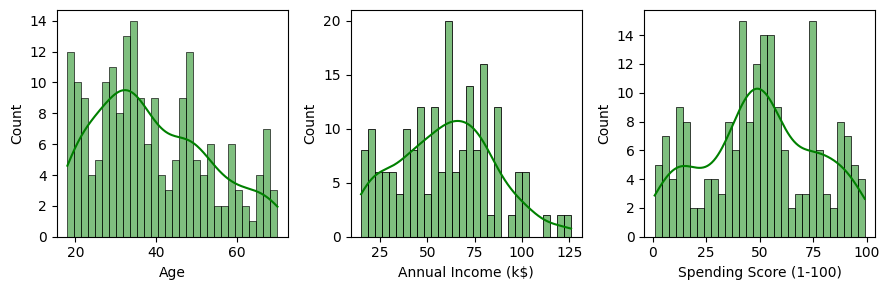

In [ ]:
#show histplot visualitation for all numeric variabel to know distribution of each variabels
plt.figure(figsize=(9,3)) #make a figure to histplot place with size that needed. In this case wide=9 and long=3
for i in range(0, len(nums)): #looping according to count of variabel of 'nums'.
    plt.subplot(1, 3, i+1) #make subplot in figure with size that needed. In this case 1 row 3 colums because there are 3 variabels.
    sns.histplot(df[nums[i]], color='green', bins=30, kde=True) #show histplot for each variabel  with green color,, and shown the line.
    plt.tight_layout() #make visualitation to good image if downloaded

Berdasarkan output di atas diketahui bahwa variabel `Age` memiliki right skewness, variabel `Annual Income` memiliki left skewness, dan variabel `Spending Score` memiliki bentuk histplot yang simetris.

In [ ]:
#Uji Kolmogrov-Smirnov
for col in nums:
  z = kstest(df[col], "norm")
  print(f"KS-test {col} :")
  print(z)

KS-test Age :
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=18, statistic_sign=-1)
KS-test Annual Income (k$) :
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=15, statistic_sign=-1)
KS-test Spending Score (1-100) :
KstestResult(statistic=0.9885490918673598, pvalue=0.0, statistic_location=3, statistic_sign=-1)


Berdasarkan output di atas diketahui bahwa ketiga variabel memilliki nilai p-value yang kurang dari taraf signifikansi (0.05) sehingga dapat disimpulkan bahwa pada taraf signifikansi 5% ketiga variabel tidak berdistribusi normal.

<Axes: xlabel='Gender', ylabel='count'>

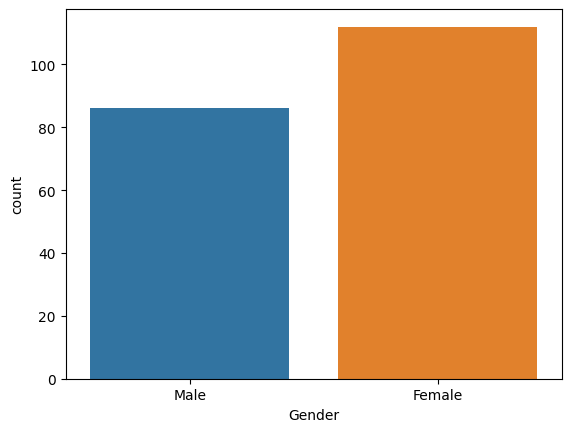

In [ ]:
#show barplot visualitation for Gender variabel to know distribution of variabel
sns.countplot(x = df['Gender'])#show countplot for Gender variabel

Berdasarkan outut di atas diketahui bahwa distribusi data pada tiap unique tidak memiliki perbedaan yang jauh.

###5.Multivariate Analysis

<Axes: >

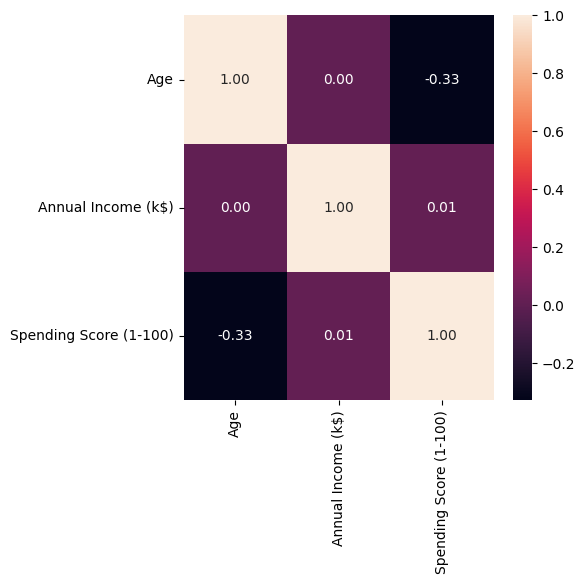

In [ ]:
#show corellation numerical variabels in dataframe 'df'
plt.figure(figsize = (5, 5))
sns.heatmap(df[nums].corr(), annot = True, fmt=".2f")

Berdasarkan output di atas diketahui bahwa antar ketiga variabel numerik tidak memiliki korelasi yang kuat. Nilai korelasi paling tinggi adalah korelasi antara variabel `Age` dengan `Spending Score` dengan nilai -0.33

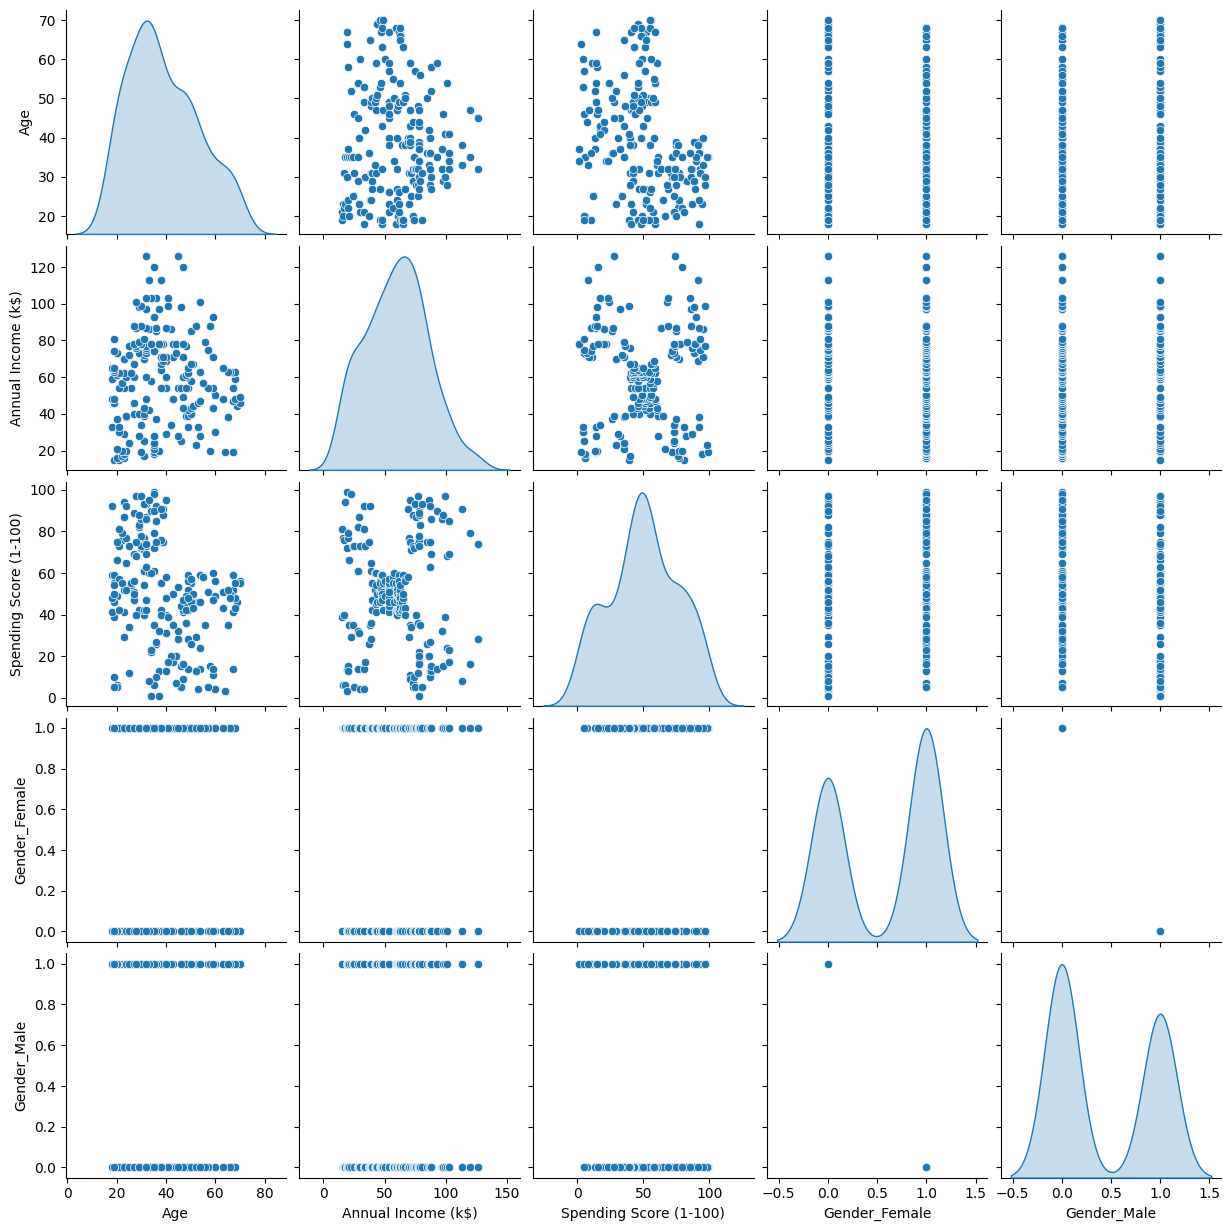

In [ ]:
#show corellation numerical variabel in dataframe 'df'
sns.pairplot(df, diag_kind='kde')

Berdasarkan output di atas terlihat pola hubungan antara variabel - variabel dalam dataframe. Dari hasil tersebut terlihat bahwa pairplot korelasi antara variabel  `Annual Income` dan `Spending Score` memiliki pola pengelompokkan tertentu. 
Pola tersebut dapat dianalasisi lebih lanjut dengan analisis clustering.

##**Clustering Process**

###1.Plot Distribution

Berdasarkan analisis multivariat yang sebelumnya dilakukan, akan dilakukan analisis clustering pada variabel `Annual Income` dan `Spending Score` untuk mengetahui pola pengelompokkannya.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

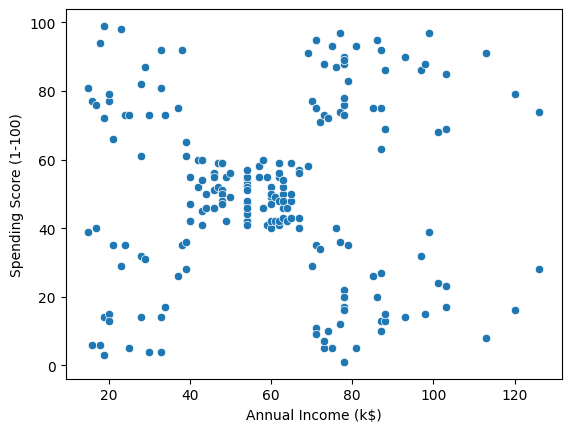

In [ ]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')

Berdasarkan output di atas dapat diindikasikan terdapat 5 kelompok dari data Mall_Customer terhadap variabel `Annual Income` dan `Spending Score`.

###2.Scalling

Sebelum dilakukan pemodelan cluster, perlu dilakukan proses scalling yang berguna untuk menstandarisasi nilai - nilai data sehingga analisis tidak terjadi kesalahan analisis karena satuan nilai data yang berbeda antar variabel. Scalling process dapat dilakukan dengan menggunakan function `StandardScaler` from sklearn.preprocessing library.

In [ ]:
#scalling process
feats = ['Annual Income (k$)',	'Spending Score (1-100)'] #variabels
X = df[feats].values #take variabels value
X_std = StandardScaler().fit_transform(X) #scalling values
df_new = pd.DataFrame(data=X_std, columns=feats) #create new dataframe fill to scalling result
df_new.head() #show dataframe

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


Berdasarkan output di atas dapat terlihat terjadi perubahan nilai data akibat scalling prosess. Data hasil scalling memiliki skala yang sama.

###3.Penentuan Jumlah Cluster

Dalam pemodelan clustering sebenarnya dapat membentuk jumlah pengelompokkan sesuai dengan kebutuhan. Namun, terdapat proses yang digunakan untuk menentukan jumlah pengelompokkan yang baik sehingga dihasilkan model clustering yang baik. Penentuan jumlah kelompok didasarkan dari perhitungan jarak seluruh nilai data terhadap centroid.

Terdapat beberapa metode dalam penentuan jumlah kelompok, antara lain:
- Metode Elbow
- Metode Sillhoutte Score






---


**Elbow Method**

Penentuan jumlah cluster menggunakan Elbow Method dapat dilakukan dengan function `Inertia`.

In [ ]:
#Elbow Method to get appropriate count of cluster
inertia = []
for i in range(2, 11): #looping inertia
  kmeans = KMeans(n_clusters=i, random_state=0) #K-Means Clustering
  kmeans.fit(df_new.values) #K-Means for df_new data
  inertia.append(kmeans.inertia_) #get appropriate count of cluster
  print('iterasi ke - ',i, 'dengan : ', kmeans.inertia_) #show iteration

iterasi ke -  2 dengan :  264.1193652650257
iterasi ke -  3 dengan :  156.23784749493416
iterasi ke -  4 dengan :  106.14889229714834
iterasi ke -  5 dengan :  61.086660977120026
iterasi ke -  6 dengan :  52.43612871836854
iterasi ke -  7 dengan :  43.77992677245515
iterasi ke -  8 dengan :  35.833644983180264
iterasi ke -  9 dengan :  30.97847198173306
iterasi ke -  10 dengan :  27.815247445596555


<Axes: >

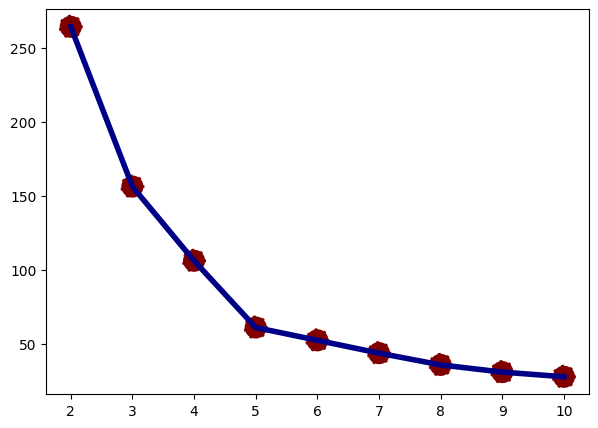

In [ ]:
#show count of cluster plot
plt.figure(figsize=(7, 5))
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


Berdasarkan output di atas dihasilkan jumlah cluster terbaik adalah sebanyak 5 cluster. Hal tersebut terlihat pada titik siku yang terdapat pada nilai 5.

---



**Silhouette Score Method**

Penentuan julam custer dengan metode Sillhouette Score Method dapat dilakukan dengan menggunakan function `silhouette_score` pada sklearn package.

<Axes: >

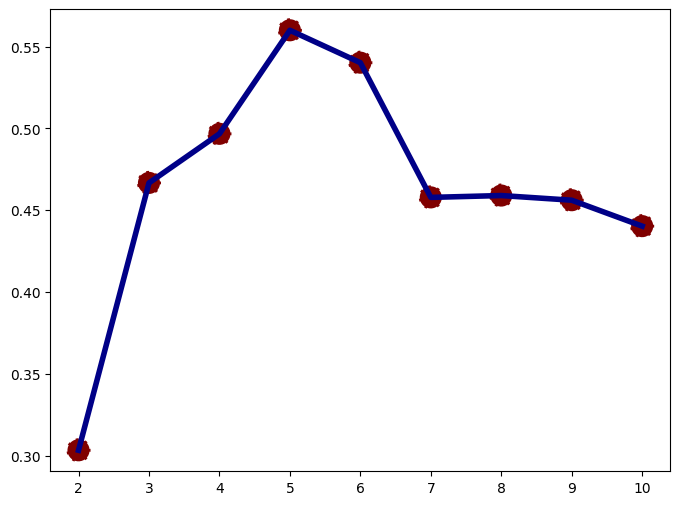

In [ ]:
#Silhouette Score Method to get appropriate count of cluster
arr_silhouette_score_euclidean = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df_new)
    preds = kmeans.predict(df_new)
    score_euclidean = silhouette_score(df_new, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

Berdasarkan output di atas dihasilkan jumlah cluster terbaik adalah sebanyak 5 cluster. Hal tersebut terlihat pada titik tertinggi yang terdapat pada nilai 5.

###4.Clustering Process

Setelah diketahui jumlah cluster terbaik yaitu 5 cluster, maka dapat dilakukan pemodelan clustering dengan menggunakan function `KMeans` pada sklearn package dengan n_clusters = 5.

In [ ]:
#Clustering Process
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(df_new.values)
df['cluster_5'] = kmeans.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster_5
0,Male,19,15,39,0,1,2
1,Male,21,15,81,0,1,3
2,Female,20,16,6,1,0,2
3,Female,23,16,77,1,0,3
4,Female,31,17,40,1,0,2


Berdasarkan output di atas terlihat bahwa telah terbentuk kolom `cluster_5` yang berisi pengelompokkan dari tiap nilai data

In [ ]:
#show value counts for each cluster
df['cluster_5'].value_counts()

1    80
4    38
0    35
2    23
3    22
Name: cluster_5, dtype: int64

Berdasarkan output di atas terlihat bahwa terdapat 80 nilai data termasuk dalam cluster 1, 38 nilai data termasuk dalam cluster 2, 35 nilai data termasuk dalam cluster 0, 23 nilai data termasuk dalam cluster 4, dan 22 nilai data termasuk dalam cluster 3.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

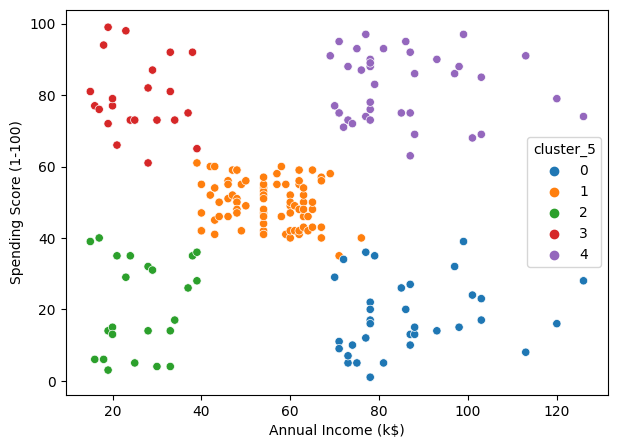

In [ ]:
#show distribution plot of clustering result
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df, x=df['Annual Income (k$)'],  y=df['Spending Score (1-100)'], hue='cluster_5', palette="tab10")

Berdasarkan output di atas dapat diketahui bahwa 
- cluster 4 merupakan cluster dengan nilai `Annual Income` yang tinggi (pendapatan tinggi) dan `Spending Income` yang tinggi (suka berbelanja).
- cluster 3 merupakan cluster dengan nilai `Annual Income` yang rendah (pendapatan rendah) dan `Spending Score` yang tinggi (suka berbelanja).
- cluster 2 merupakan cluster dengan nilai `Annual Income` yang rendah (pendapatan rendah) dan `Spending Score` yang rendah (kurang suka berbelanja).
- cluster 1 merupakan cluster dengan nilai `Annual Income` yang sedang (pendapatan sedang) dan `Spending Score` yang sedang (lumayan suka berbelanja).
- cluster 0 merupakan cluster dengan nilai `Annual Income` yang tinggi (pendapatan tinggi) dan `Spending Score` yang rendah (kurang suka berbelanja).

In [ ]:
#show means for each cluster 
mean = display(df.groupby('cluster_5').agg(['mean']))

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
,mean,mean,mean,mean,mean
cluster_5,,,,,
0,40.914286,86.342857,17.571429,0.485714,0.514286
1,42.937500,55.087500,49.712500,0.587500,0.412500
2,45.217391,26.304348,20.913043,0.608696,0.391304
3,25.272727,25.727273,79.363636,0.590909,0.409091
4,32.763158,85.210526,82.105263,0.552632,0.447368


Berdasarkan output di atas diketahui nilai rata-rata `Annual Income` dan `Spending Score` dari tiap cluster. Diketahui bahwa:
- cluster 0 memiliki rata-rata `Annual Income` 86.342857 dan `Spending Score` 17.571429.
- cluster 1 memiliki rata-rata `Annual Income` 55.087500 dan `Spending Score` 49.712500. 
- cluster 2 memiliki rata-rata `Annual Income` 26.304348 dan `Spending Score` 20.913043.
- cluster 3 memiliki rata-rata `Annual Income` 25.727273 dan `Spending Score` 79.363636.
- cluster 4 memiliki rata-rata `Annual Income` 85.210526 dan `Spending Score` 82.105263	.

###5.Model Evaluation (Metric Evaluation)


In [ ]:
#metics evaluation
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(df_new)
 
print("Silhouette Coefficient: %0.3f" % silhouette_score(df_new, labels))
print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(df_new, labels))
print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(df_new, labels))

Silhouette Coefficient: 0.560
Calinski-Harabasz Index: 264.535
Davies-Bouldin Index: 0.566


Berdasarkan nilai metrik evaluasi diatas, dapat dikatakan bahwa clustering memiliki performa yang cukup baik.

Nilai `Silhouette Coefficient` yang tinggi menunjukkan bahwa objek-objek pada klaster memiliki kesamaan yang tinggi dalam satu klaster dan perbedaan yang tinggi dengan klaster lainnya. Semakin dekat nilai Silhouette Coefficient dengan 1, semakin baik performa clustering.

Nilai `Calinski-Harabasz Index` yang tinggi menunjukkan bahwa klaster-klasternya memiliki kepadatan yang tinggi dan terpisah dengan baik dari klaster lainnya. Semakin tinggi nilai Calinski-Harabasz Index, semakin baik performa clustering.

Sedangkan, nilai `Davies-Bouldin Index` yang rendah menunjukkan bahwa klaster-klasternya memiliki jarak yang cukup jauh antara satu dengan yang lainnya dan klaster-klasternya lebih kompak. Semakin rendah nilai Davies-Bouldin Index (mendekati 0), semakin baik performa clustering

##**Kesimpulan**
Berdasarkan analisis data dan pemodelan k-means clustering didapatkan kesimpulan bahwa:
- Mayoritas pelanggan adalah perempuan
- Terdapat 5 jenis kelompok/segmentasi pelanggan mall
- Cluster 4 yang terdiri dari 23 pelanggan merupakan cluster dengan nilai `Annual Income` yang tinggi (pendapatan tinggi) dan `Spending Income` yang tinggi (suka berbelanja) dengan rata-rata `Annual Income` 85.210526 dan `Spending Score` 82.105263
- cluster 3 yang terdiri dari 22 pelanggan merupakan cluster dengan nilai `Annual Income` yang rendah (pendapatan rendah) dan `Spending Score` yang tinggi (suka berbelanja) dengan rata-rata `Annual Income` 25.727273 dan `Spending Score` 79.363636
-Cluster 2 yang terdiri dari 38 pelanggan merupakan cluster dengan nilai `Annual Income` yang rendah (pendapatan rendah) dan `Spending Score` yang rendah (kurang suka berbelanja) dengan rata-rata `Annual Income` 26.304348 dan `Spending Score` 20.913043
- Cluster 1 yang terdiri dari 80 pelanggan merupakan cluster dengan nilai `Annual Income` yang sedang (pendapatan sedang) dan `Spending Score` yang sedang (lumayan suka berbelanja) dengan rata-rata `Annual Income` 55.087500 dan `Spending Score` 49.712500
- Cluster 0 yang terdiri dari 35 pelanggan merupakan cluster dengan nilai `Annual Income` yang tinggi (pendapatan tinggi) dan `Spending Score` yang rendah (kurang suka berbelanja) dengan rata-rata `Annual Income` 86.342857 dan `Spending Score` 17.571429

Dari kesimpulan tersebut mungkin dapat dilakukan strategi penjualan/ marketing sesuai karakteristik dari target segmentasi untuk meningkatkan pendapatan mall.
